# Pet Finder - Adopción de Mascotas

PetFinder.es una plataforma de adopción de Mascotas de Malasia, con una base de datos de más de 150.000 animales. 

Las tasas de adopción de animales están fuertemente correlacionadas con los metadatos asociados con sus perfiles en línea, como el texto descriptivo y las características de las fotografías. Como ejemplo, PetFinder está experimentando actualmente con una herramienta de inteligencia artificial simple llamada Cuteness Meter, que clasifica qué tan linda es una mascota en función de las cualidades presentes en sus fotos.

En esta competencia, desarrollará algoritmos para predecir la adoptabilidad de las mascotas, específicamente, ¿qué tan rápido se adopta una mascota?

Web Organización: https://www.petfinder.my/

Datos: https://www.kaggle.com/c/petfinder-adoption-prediction



## Script Inicial - Análisis Exploratorio

En este trabajo se busca predecir la velocidad a la que se adopta una mascota, según la lista de la mascota en PetFinder. 

A veces, un perfil representa a un grupo de mascotas. En este caso, la velocidad de adopción está determinada por la velocidad a la que se adoptan todas las mascotas. 

Los datos incluyen datos de **Texto Libre**, **Datos Tabulares** e **Emágenes**, lo que lo hace un dataset sumamente rico para explorar

### Ejemplos de Scripts de EDA (Exploratory Data Analysis)

* En R: https://www.kaggle.com/jaseziv83/an-extensive-eda-of-petfinder-my-data
* En Python: https://www.kaggle.com/artgor/exploration-of-data-step-by-step

File descriptions:

* train.csv - Tabular/text data for the training set
* test.csv - Tabular/text data for the test set
* sample_submission.csv - A sample submission file in the correct format
* breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* color_labels.csv - Contains ColorName for each ColorID
* state_labels.csv - Contains StateName for each StateID

In [3]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [ ]:
# Datos Tabulares
# train = pd.read_csv('./input/petfinder-adoption-prediction/train/train.csv.zip')

In [35]:
train = pd.read_csv('c:\\Users\\iparra\\Downloads\\train\\train.csv')

In [5]:
train.shape

(14993, 24)

In [ ]:
train.shape

(14993, 24)

In [ ]:
train.head() 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### Data Fields

* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

Text(0.5, 1.0, 'Adoption speed classes counts')

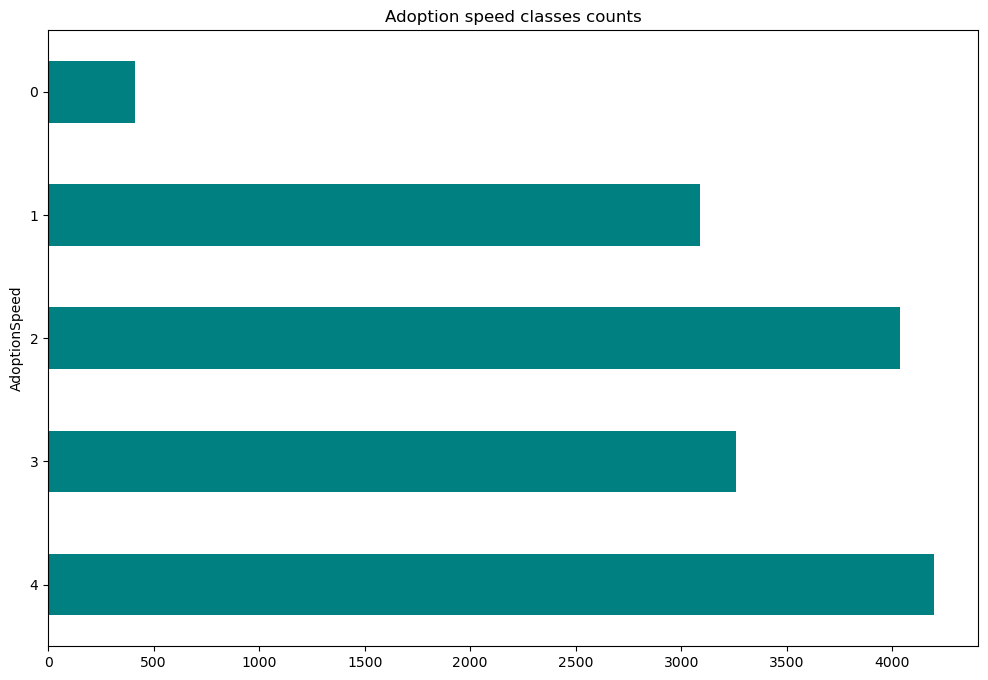

In [6]:
train['AdoptionSpeed'].value_counts().sort_index(ascending = False).plot(kind='barh', color='teal')
plt.title('Adoption speed classes counts')

### Target: AdoptionSpeed

The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:

* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [ ]:
# Mapeamos el Tipo de Mascota
train['Type'] = train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

Text(0.5, 1.0, 'Number of cats and dogs')

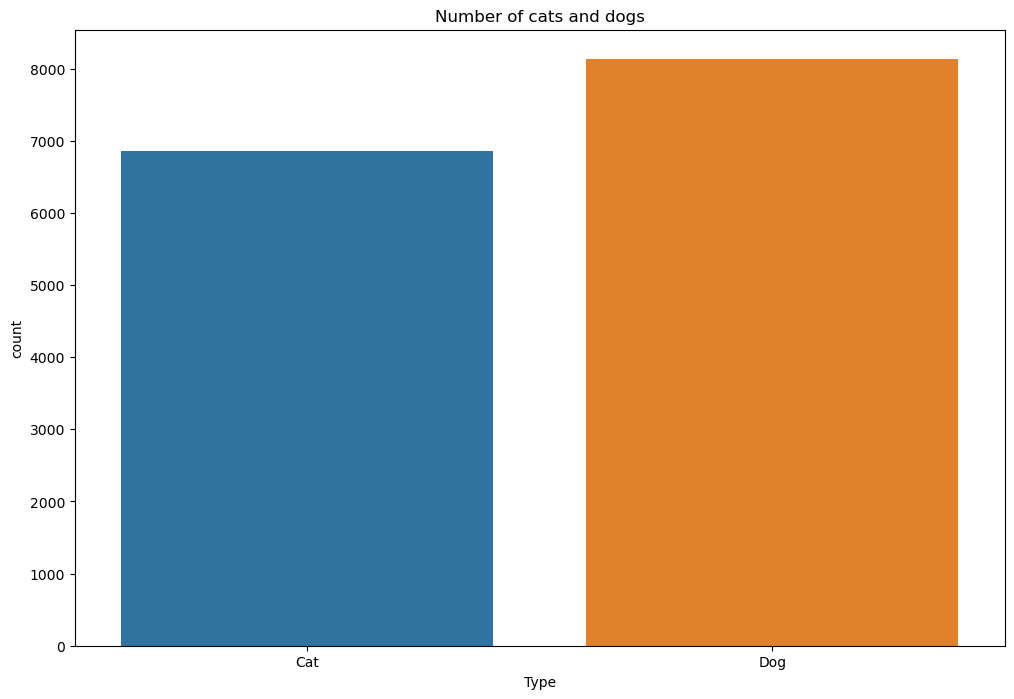

In [ ]:
sns.countplot(x='Type', data=train)
plt.title('Number of cats and dogs')

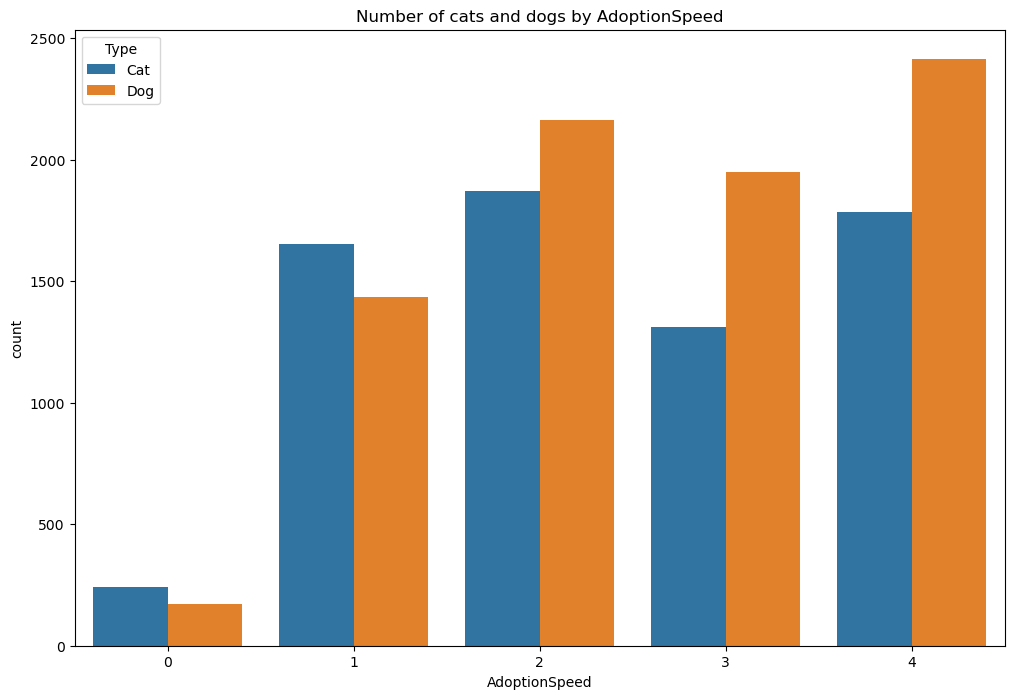

In [ ]:
sns.countplot(x='AdoptionSpeed', data=train, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

In [9]:
train.Name.value_counts()

Name
Unnamed                   1270
Baby                        66
Lucky                       64
Brownie                     54
No Name                     54
                          ... 
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Lab Mix Puppy 2              1
Fili                         1
Name: count, Length: 9059, dtype: int64

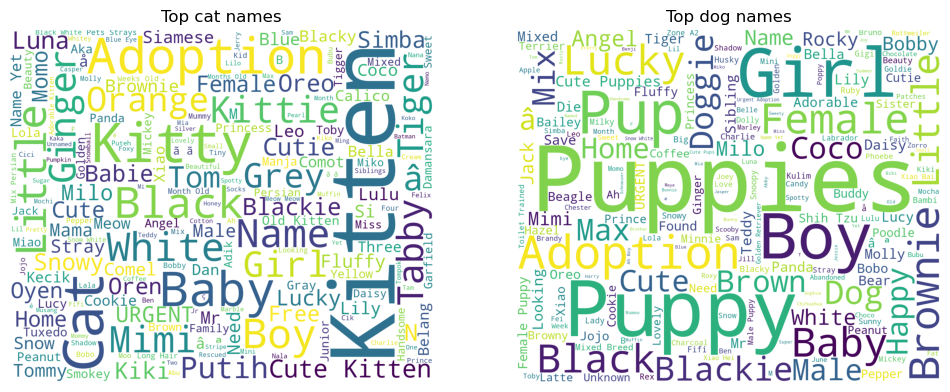

In [ ]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train.loc[train['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train.loc[train['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

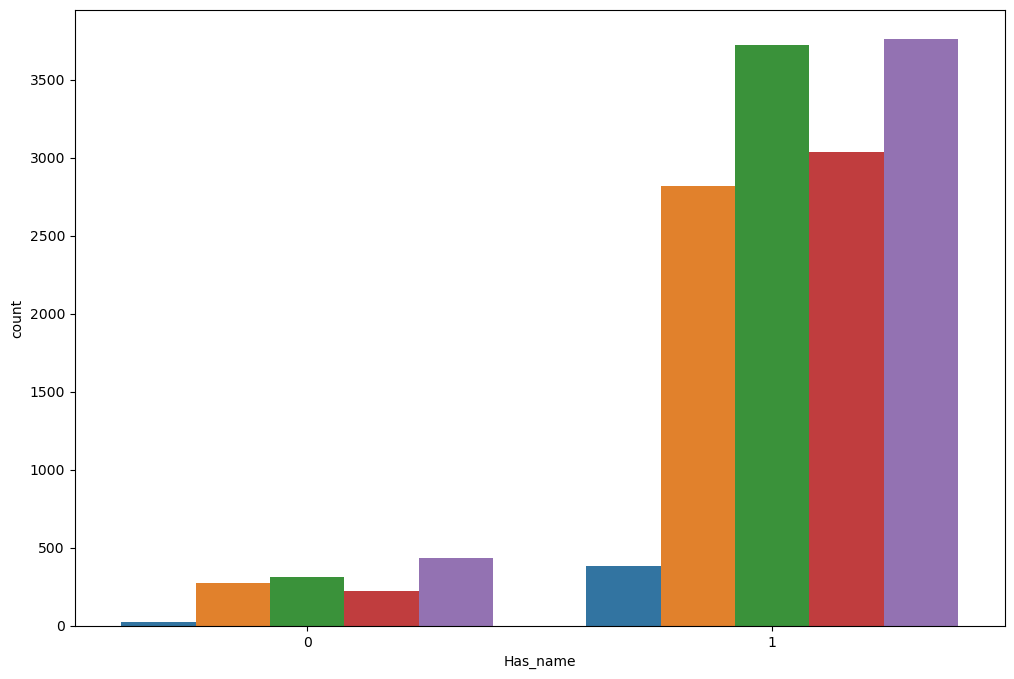

In [8]:
train['Name'] = train['Name'].fillna('Unnamed')
train['Has_name'] = 1
train.loc[train['Name'] == 'Unnamed', 'Has_name'] = 0

sns.countplot(x='Has_name', data=train, hue='AdoptionSpeed')

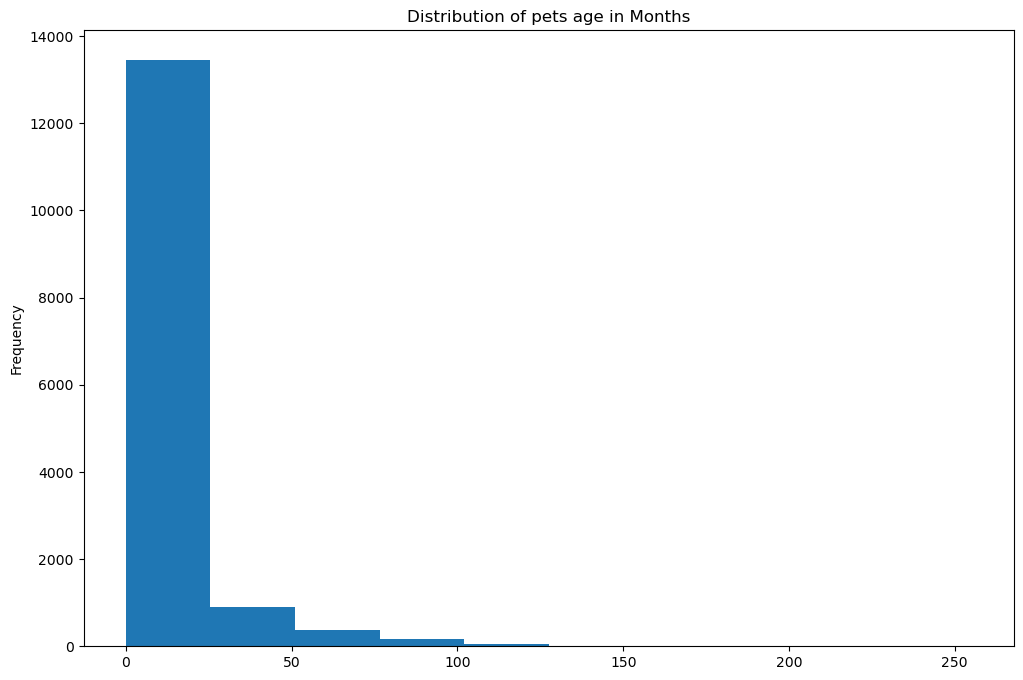

In [10]:
train['Age'].plot(kind='hist')
plt.title('Distribution of pets age in Months');

## Tareas a Realizar

#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar
* Chequear Variables Categóricas y convertirlas en Numéricas
* Estandarizar o Normalizar

#### Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target


#### Análisis del Texto Libre de la Descripción:

* Tokenizar Palabras más frecuentes
* Limpiar palabras
* Bag of Words / TF-IDF



# Pre-procesamiento

In [ ]:
train.isna().sum() 

Type              0
Name              0
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description      13
PetID             0
PhotoAmt          0
AdoptionSpeed     0
Has_name          0
dtype: int64

In [11]:
train[train['Description'].isnull()]
train['Description'] = train['Description'].fillna('Undescripted')

In [12]:
# Convertir variables categóricas en numéricas usando One-Hot Encoding
categorical_columns = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 
                       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 
                       'Health', 'State']

df = pd.get_dummies(train, columns=categorical_columns)

In [ ]:
# Estandarizar o Normalizar
from sklearn.preprocessing import StandardScaler

# Estandarizar las columnas numéricas
numerical_columns = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# EDA

In [ ]:
train.dtypes

Type              object
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
Has_name           int64
dtype: object

In [47]:
df = train.copy()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


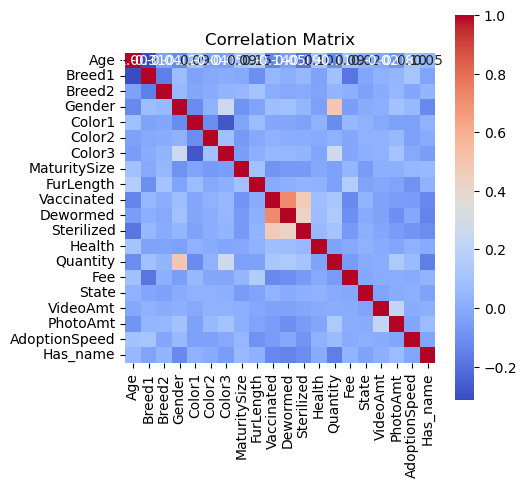

In [ ]:
# Convertir la variable AdoptionSpeed a entero
df['AdoptionSpeed'] = df['AdoptionSpeed'].astype(int)

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Conclusión: no hay correlacion lineal entre las variables.

In [ ]:
df['Breed1'].groupby(df['AdoptionSpeed']).value_counts().copy()


AdoptionSpeed  Breed1
0              266       92
               307       81
               265       45
               285       20
               292       18
                         ..
4              274        1
               284        1
               286        1
               293        1
               297        1
Name: count, Length: 515, dtype: int64

### Analizar la Raza de las Mascotas

In [48]:
dogs = df[df['Type'] == 1].copy()
cats = df[df['Type'] == 2].copy()

In [ ]:
dogs['Breed1'].value_counts().nlargest(10)

Breed1
307    5923
141     205
205     189
179     167
218     161
109     151
103      98
20       90
213      89
189      88
Name: count, dtype: int64

In [ ]:
cats['Breed1'].value_counts().nlargest(10)

Breed1
266    3634
265    1258
299     342
264     296
292     264
285     221
254     105
243      94
283      73
247      71
Name: count, dtype: int64

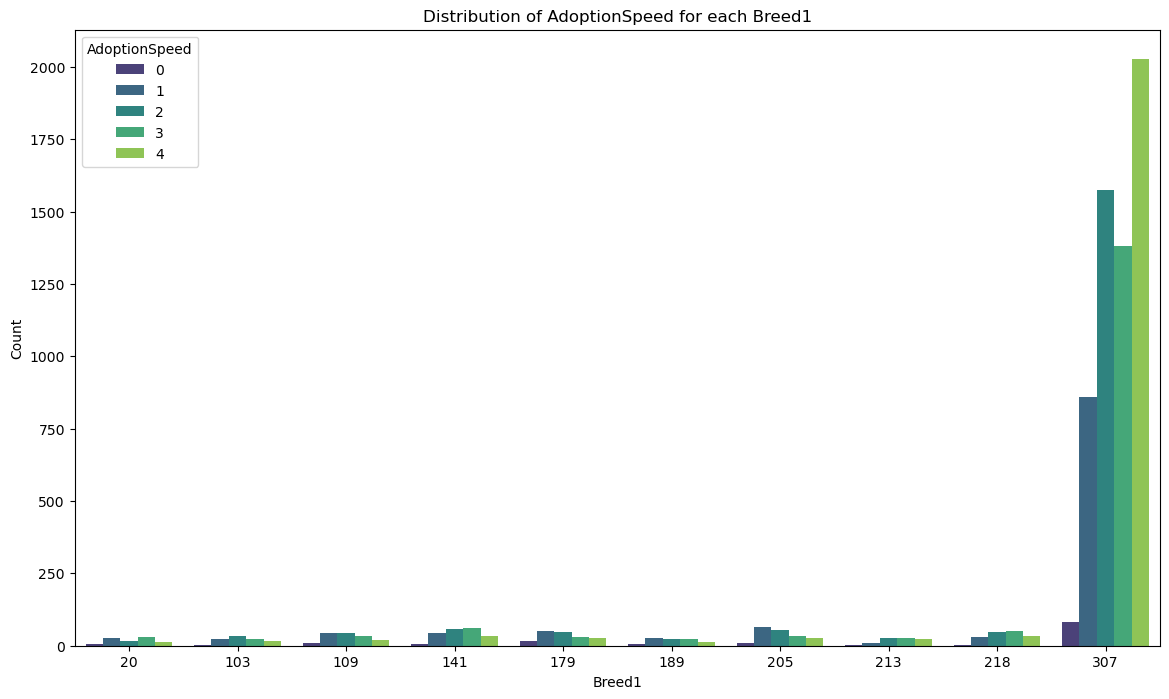

In [ ]:
# Filtrar los datos para evitar demasiadas categorías en Breed1
top_breeds = dogs['Breed1'].value_counts().nlargest(10).index
filtered_dogs = dogs[dogs['Breed1'].isin(top_breeds)]

# Gráfico de barras: distribución de AdoptionSpeed para cada Breed1
plt.figure(figsize=(14, 8))
sns.countplot(x='Breed1', hue='AdoptionSpeed', data=filtered_dogs, palette='viridis', order = filtered_dogs['Breed1'].value_counts().index)
plt.title('Distribution of AdoptionSpeed for each Breed1')
plt.xlabel('Breed1')
plt.ylabel('Count')
plt.legend(title='AdoptionSpeed')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14972\3122355529.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dogs_breed1['AdoptionSpeed'] = filtered_dogs_breed1['AdoptionSpeed'].astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14972\3122355529.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dogs_breed2['AdoptionSpeed'] = filtered_dogs_breed2['AdoptionSpeed'].astype(int)


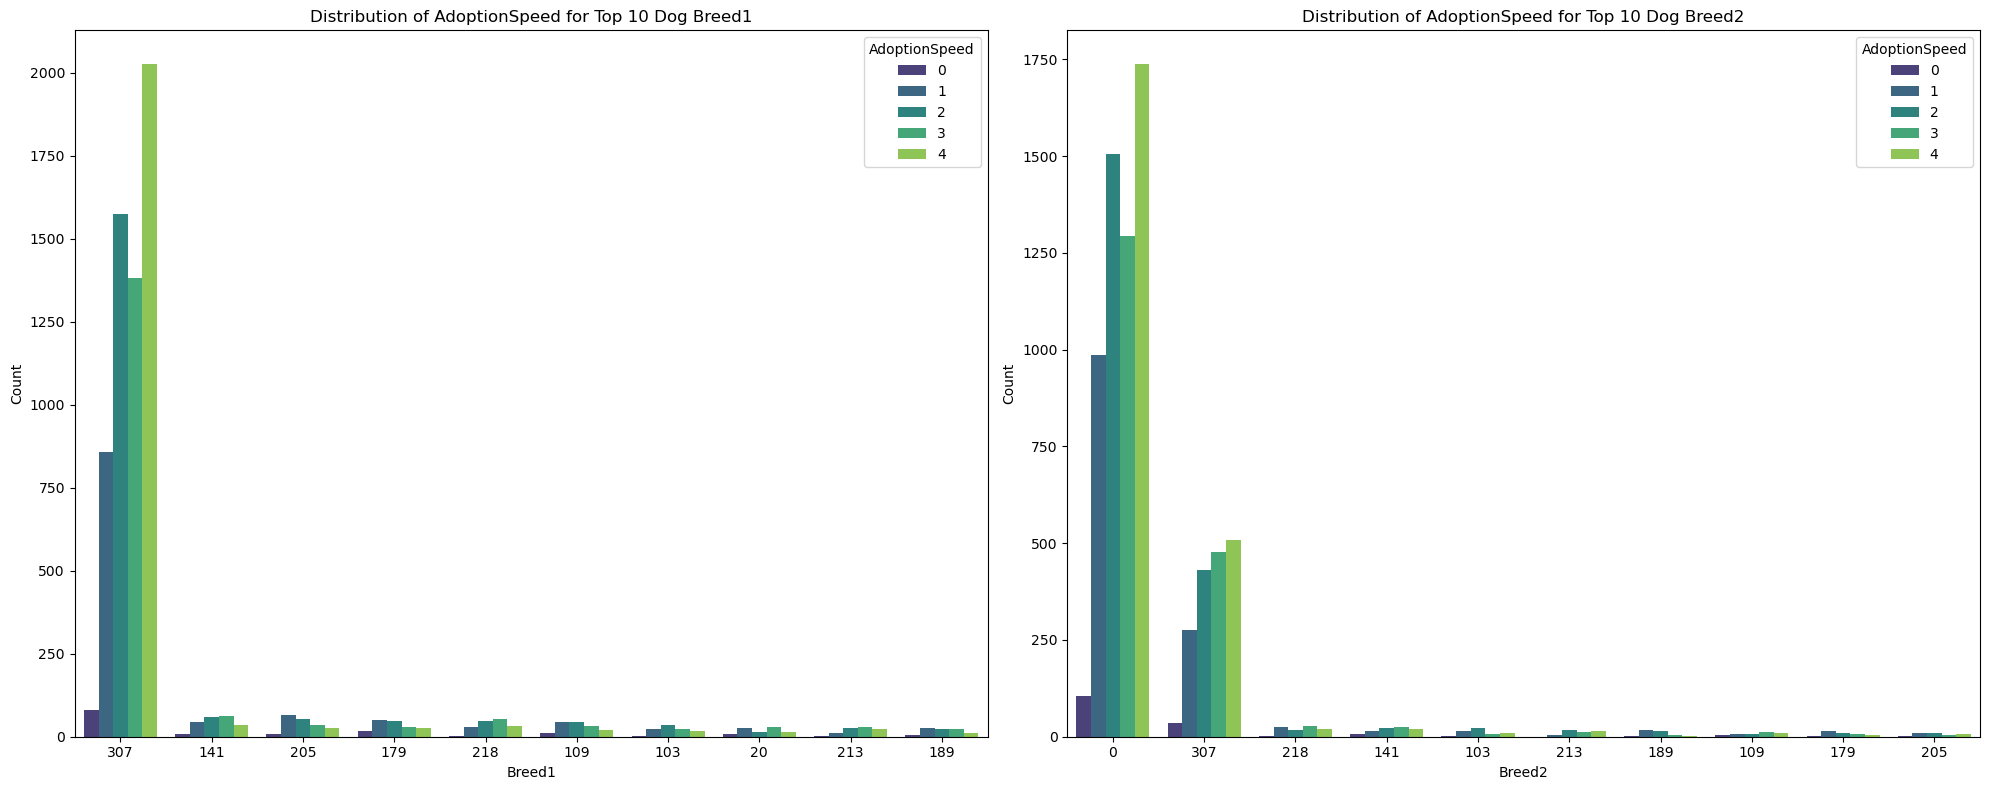

In [ ]:
# Seleccionar las 10 razas más populares para Breed1 y Breed2
top_breed1 = dogs['Breed1'].value_counts().nlargest(10).index
top_breed2 = dogs['Breed2'].value_counts().nlargest(10).index

filtered_dogs_breed1 = dogs[dogs['Breed1'].isin(top_breed1)]
filtered_dogs_breed2 = dogs[dogs['Breed2'].isin(top_breed2)]

# Convertir la variable AdoptionSpeed a entero
filtered_dogs_breed1['AdoptionSpeed'] = filtered_dogs_breed1['AdoptionSpeed'].astype(int)
filtered_dogs_breed2['AdoptionSpeed'] = filtered_dogs_breed2['AdoptionSpeed'].astype(int)

# Crear las figuras y ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Gráfico de barras para Breed1
sns.countplot(ax=axes[0], x='Breed1', hue='AdoptionSpeed', data=filtered_dogs_breed1, palette='viridis', order = filtered_dogs['Breed1'].value_counts().index)
axes[0].set_title('Distribution of AdoptionSpeed for Top 10 Dog Breed1')
axes[0].set_xlabel('Breed1')
axes[0].set_ylabel('Count')
axes[0].legend(title='AdoptionSpeed')

# Gráfico de barras para Breed2
sns.countplot(ax=axes[1], x='Breed2', hue='AdoptionSpeed', data=filtered_dogs_breed2, palette='viridis', order = filtered_dogs_breed2['Breed2'].value_counts().index)
axes[1].set_title('Distribution of AdoptionSpeed for Top 10 Dog Breed2')
axes[1].set_xlabel('Breed2')
axes[1].set_ylabel('Count')
axes[1].legend(title='AdoptionSpeed')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14972\101274634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cats_breed1['AdoptionSpeed'] = filtered_cats_breed1['AdoptionSpeed'].astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14972\101274634.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cats_breed2['AdoptionSpeed'] = filtered_cats_breed2['AdoptionSpeed'].astype(int)


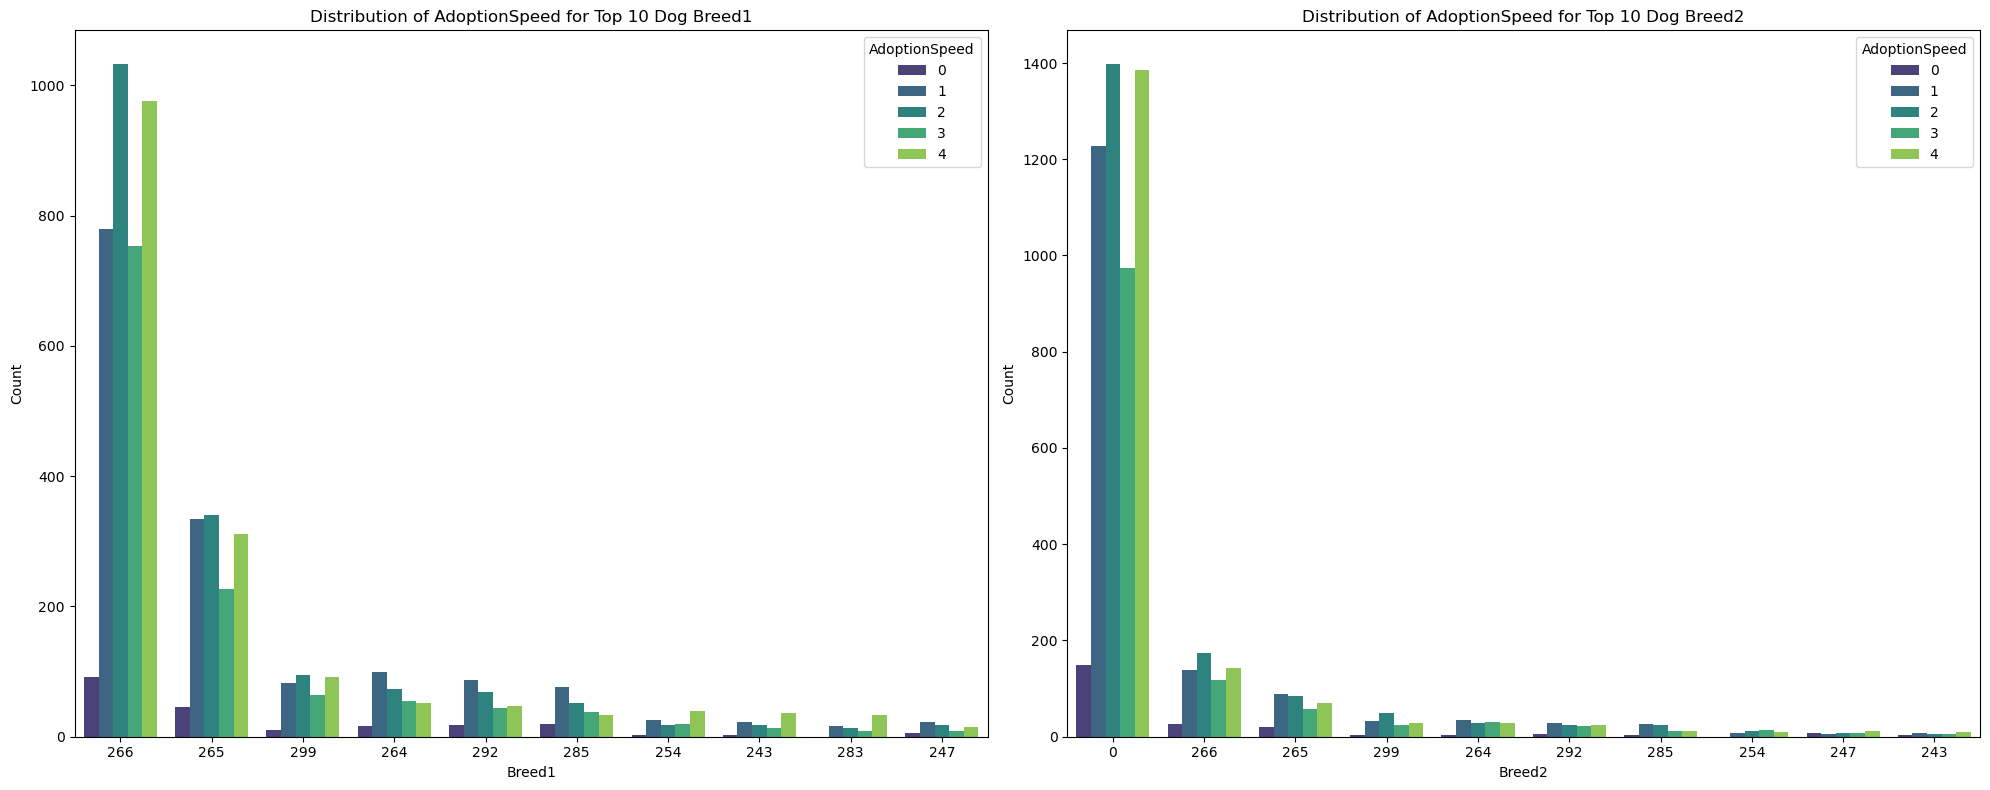

In [ ]:
# Seleccionar las 10 razas más populares para Breed1 y Breed2
top_breed1 = cats['Breed1'].value_counts().nlargest(10).index
top_breed2 = cats['Breed2'].value_counts().nlargest(10).index

filtered_cats_breed1 = cats[cats['Breed1'].isin(top_breed1)]
filtered_cats_breed2 = cats[cats['Breed2'].isin(top_breed2)]

# Convertir la variable AdoptionSpeed a entero
filtered_cats_breed1['AdoptionSpeed'] = filtered_cats_breed1['AdoptionSpeed'].astype(int)
filtered_cats_breed2['AdoptionSpeed'] = filtered_cats_breed2['AdoptionSpeed'].astype(int)

# Crear las figuras y ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Gráfico de barras para Breed1
sns.countplot(ax=axes[0], x='Breed1', hue='AdoptionSpeed', data=filtered_cats_breed1, palette='viridis', order = filtered_cats['Breed1'].value_counts().index)
axes[0].set_title('Distribution of AdoptionSpeed for Top 10 Dog Breed1')
axes[0].set_xlabel('Breed1')
axes[0].set_ylabel('Count')
axes[0].legend(title='AdoptionSpeed')

# Gráfico de barras para Breed2
sns.countplot(ax=axes[1], x='Breed2', hue='AdoptionSpeed', data=filtered_cats_breed2, palette='viridis', order = filtered_cats_breed2['Breed2'].value_counts().index)
axes[1].set_title('Distribution of AdoptionSpeed for Top 10 Dog Breed2')
axes[1].set_xlabel('Breed2')
axes[1].set_ylabel('Count')
axes[1].legend(title='AdoptionSpeed')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

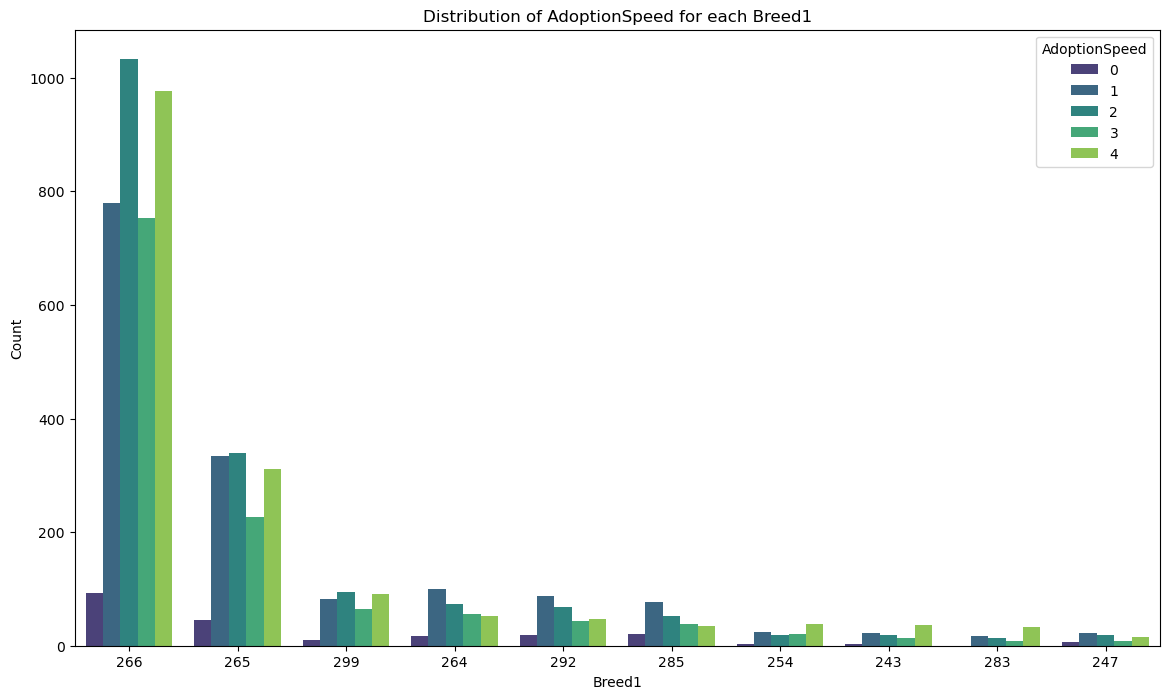

In [ ]:
# Filtrar los datos para evitar demasiadas categorías en Breed1
top_breeds = cats['Breed1'].value_counts().nlargest(10).index
filtered_cats = cats[cats['Breed1'].isin(top_breeds)]

# Gráfico de barras: distribución de AdoptionSpeed para cada Breed1
plt.figure(figsize=(14, 8))
sns.countplot(x='Breed1', hue='AdoptionSpeed', data=filtered_cats, palette='viridis',  order = filtered_cats['Breed1'].value_counts().index)
plt.title('AdoptionSpeed ~ Breed1 Dogs')
plt.xlabel('Breed1')
plt.ylabel('Count')
plt.legend(title='AdoptionSpeed')
plt.show()

### Analizar el Género


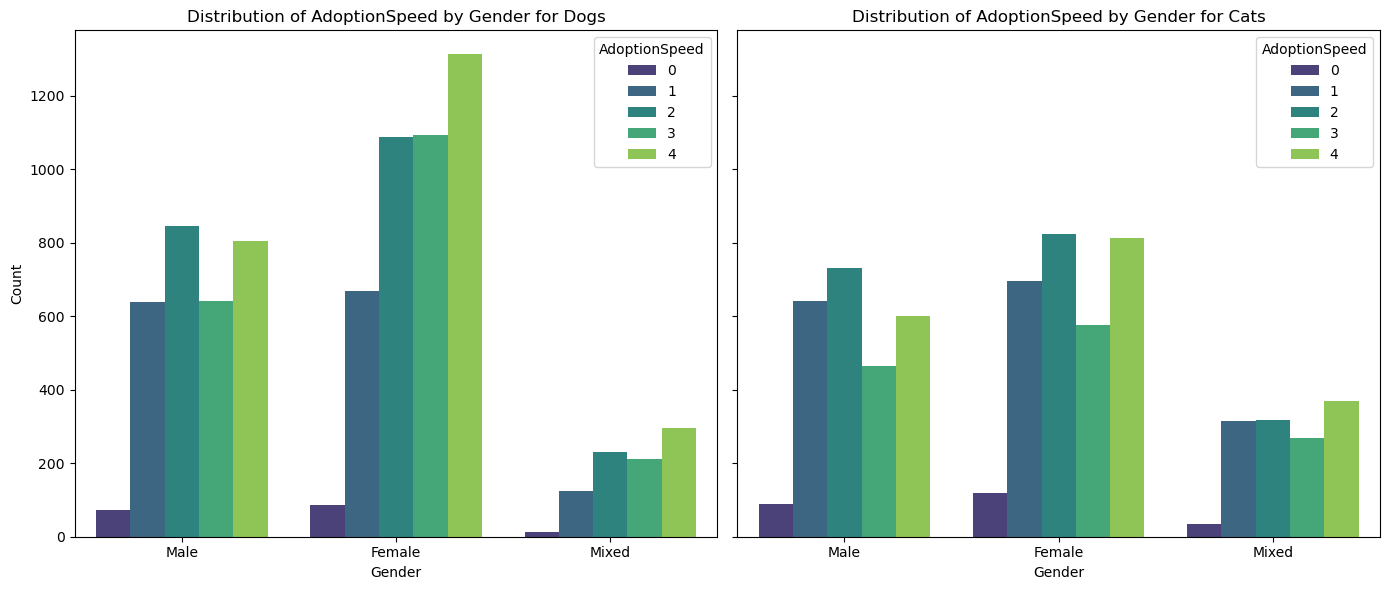

In [ ]:
# Crear las figuras y ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Gráfico de barras para los perros
sns.countplot(ax=axes[0], x='Gender', hue='AdoptionSpeed', data=dogs, palette='viridis')
axes[0].set_title('AdoptionSpeed por Genero Perros')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Male', 'Female', 'Mixed'])
axes[0].legend(title='AdoptionSpeed')

# Gráfico de barras para los gatos
sns.countplot(ax=axes[1], x='Gender', hue='AdoptionSpeed', data=cats, palette='viridis')
axes[1].set_title('AdoptionSpeed por Genero Gatos')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Male', 'Female', 'Mixed'])
axes[1].legend(title='AdoptionSpeed')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Series([], Name: count, dtype: int64)

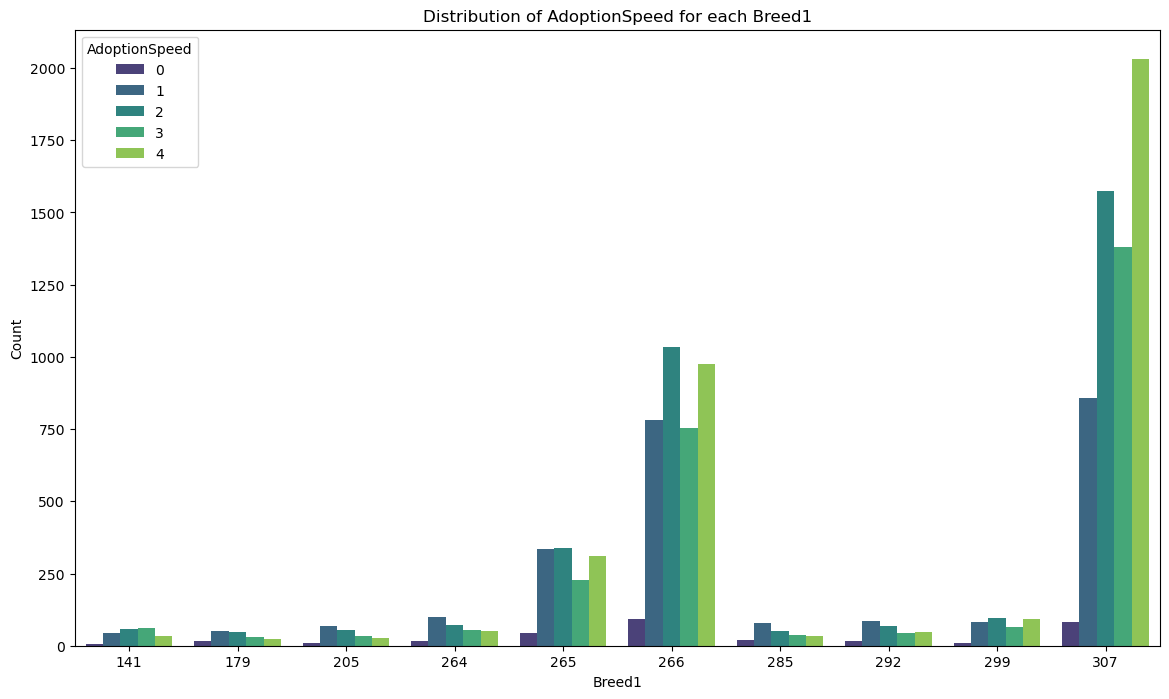

### Analizar los 3 Colores Informados para cada Mascota


In [17]:
# Crear una columna para representar la combinación de colores
df['Colors'] = df.apply(lambda x: f"{x['Color1']}_{x['Color2']}_{x['Color3']}", axis=1)

# Mostrar algunas filas para ver la nueva columna
print(df[['Color1', 'Color2', 'Color3', 'Colors']].head())

   Color1  Color2  Color3 Colors
0       1       7       0  1_7_0
1       1       2       0  1_2_0
2       2       7       0  2_7_0
3       1       2       0  1_2_0
4       1       0       0  1_0_0


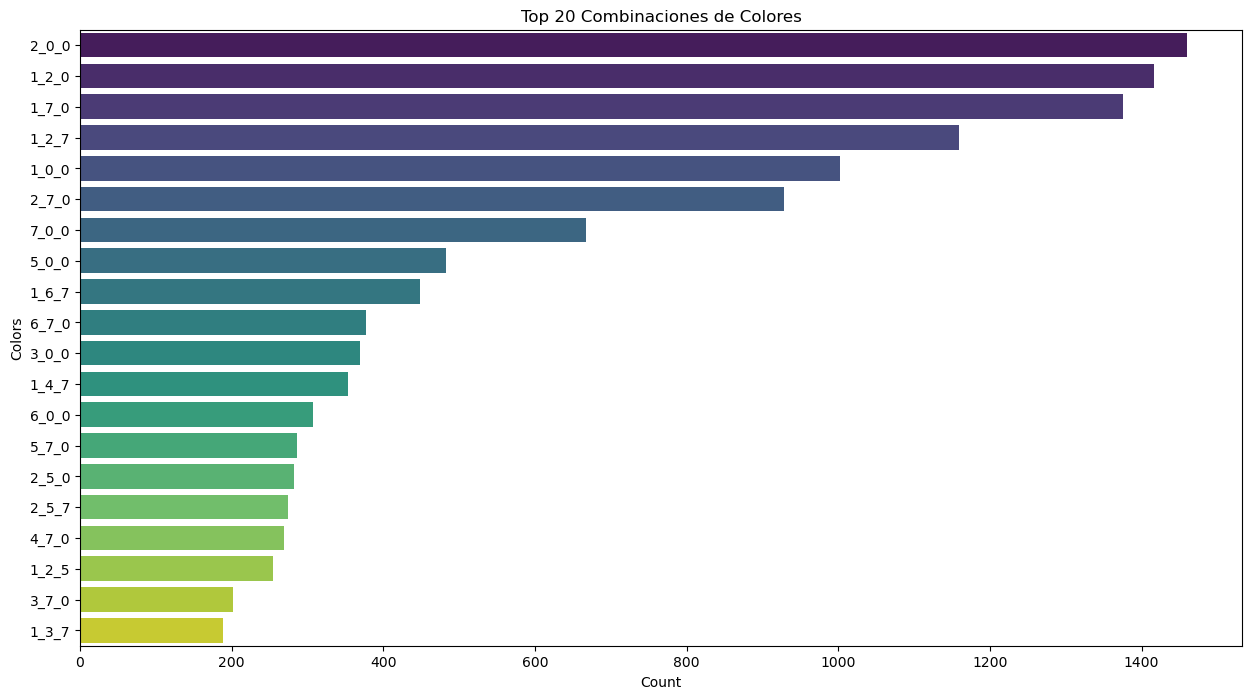

In [24]:
# Contar la frecuencia de cada combinación de colores
color_counts = df['Colors'].value_counts().reset_index()
color_counts.columns = ['Colors', 'Count']

# Graficar la distribución de combinaciones de colores
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='Colors', data=color_counts.head(20), palette='viridis')
plt.title('Top 20 Combinaciones de Colores')
plt.show()

# Analizar la relación entre los colores y la velocidad de adopción
# color_adoption = df.groupby('Colors')['AdoptionSpeed'].mean().reset_index()
# color_adoption.columns = ['Colors', 'Avg_AdoptionSpeed']

# Graficar la relación entre combinaciones de colores y la velocidad promedio de adopción
# plt.figure(figsize=(15, 8))
# sns.barplot(x='Avg_AdoptionSpeed', y='Colors', data=color_adoption.sort_values('Avg_AdoptionSpeed').head(20), palette='viridis')
# plt.title('Velocidad de Adopción Promedio por Combinación de Colores (Top 20)')
# plt.show()

     AdoptionSpeed Colors  Count
20               0  2_0_0     41
6                0  1_2_7     39
19               0  1_7_0     34
32               0  2_7_0     27
1                0  1_2_0     19
52               0  6_7_0     18
18               0  1_6_7     16
27               0  2_5_0     15
47               0  5_0_0     15
33               0  3_0_0     15
75               1  1_7_0    300
76               1  2_0_0    259
55               1  1_2_0    237
60               1  1_2_7    210
54               1  1_0_0    182
115              1  7_0_0    176
91               1  2_7_0    169
74               1  1_6_7    122
109              1  5_0_0    117
114              1  6_7_0     94
117              2  1_2_0    428
137              2  1_7_0    367
138              2  2_0_0    354
122              2  1_2_7    330
116              2  1_0_0    263
153              2  2_7_0    239
177              2  7_0_0    182
171              2  5_0_0    124
136              2  1_6_7    115
154       

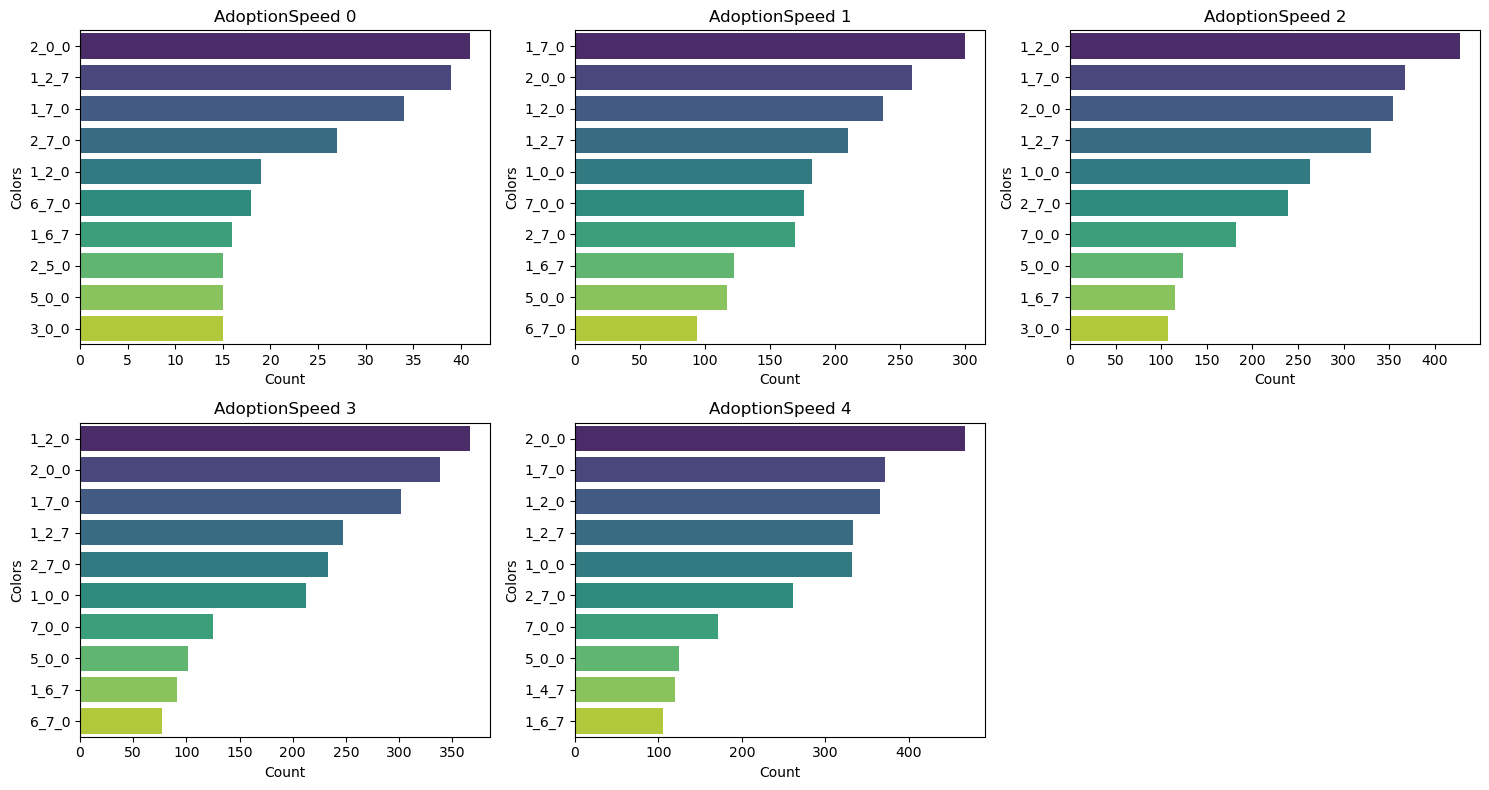

In [28]:
# Contar la frecuencia de cada combinación de colores para cada velocidad de adopción
color_adoption_counts = df.groupby(['AdoptionSpeed', 'Colors']).size().reset_index(name='Count')


# Crear una lista para almacenar los resultados del top 10 por cada AdoptionSpeed
top_10_colors_per_speed = []

# Iterar sobre cada valor único de AdoptionSpeed y obtener el top 10
for speed in color_adoption_counts['AdoptionSpeed'].unique():
    top_colors = color_adoption_counts[color_adoption_counts['AdoptionSpeed'] == speed]
    top_10_colors = top_colors.sort_values(by='Count', ascending=False).head(10)
    top_10_colors_per_speed.append(top_10_colors)

# Concatenar todos los top 10 en un solo DataFrame
top_10_colors_per_speed_df = pd.concat(top_10_colors_per_speed)

# Mostrar el resultado
print(top_10_colors_per_speed_df)

# Configuración de la figura
plt.figure(figsize=(15, 8))

# Iterar sobre cada velocidad de adopción para crear subplots
for i, speed in enumerate(color_adoption_counts['AdoptionSpeed'].unique()):
    plt.subplot(2, 3, i + 1)
    top_colors = top_10_colors_per_speed_df[top_10_colors_per_speed_df['AdoptionSpeed'] == speed]
    sns.barplot(x='Count', y='Colors', data=top_colors, palette='viridis')
    plt.title(f'AdoptionSpeed {speed}')

plt.tight_layout()
plt.show()

     AdoptionSpeed Colors  Count
13               0  2_0_0     31
5                0  1_2_7     24
22               0  2_7_0     13
1                0  1_2_0     12
28               0  5_0_0     11
23               0  3_0_0      9
0                0  1_0_0      8
30               0  5_7_0      7
32               0  7_0_0      7
12               0  1_7_0      6
34               1  1_2_0    207
51               1  2_0_0    203
39               1  1_2_7    125
64               1  2_7_0    115
50               1  1_7_0    109
33               1  1_0_0    101
76               1  5_0_0     86
82               1  7_0_0     85
79               1  5_7_0     39
65               1  3_0_0     35
84               2  1_2_0    375
102              2  2_0_0    308
89               2  1_2_7    216
116              2  2_7_0    185
83               2  1_0_0    174
101              2  1_7_0    144
128              2  5_0_0    100
134              2  7_0_0     90
111              2  2_5_0     58
117       

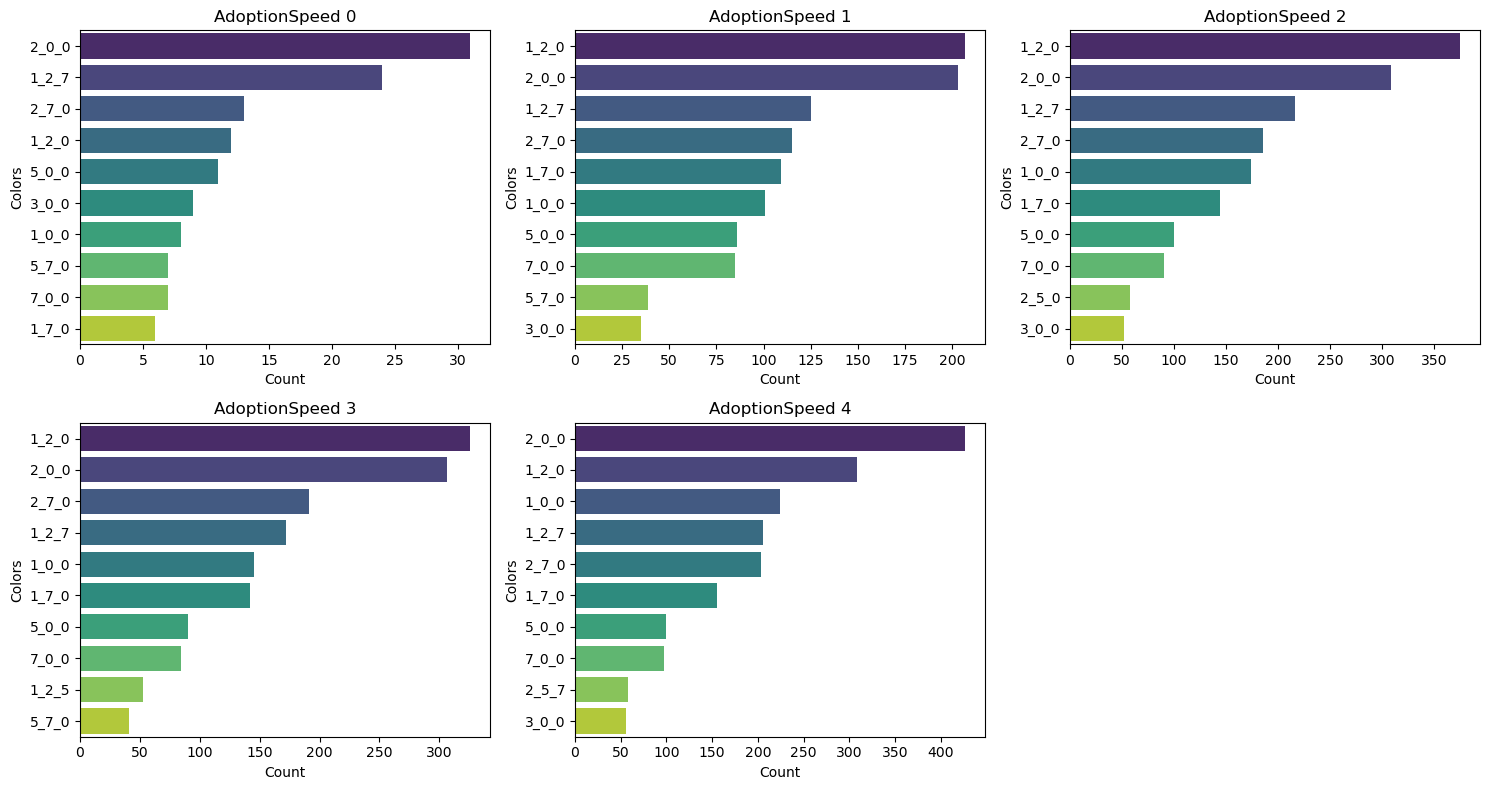

In [50]:
# PERROS: Contar la frecuencia de cada combinación de colores para cada velocidad de adopción
dogs['Colors'] = dogs.apply(lambda x: f"{x['Color1']}_{x['Color2']}_{x['Color3']}", axis=1)
color_adoption_counts = dogs.groupby(['AdoptionSpeed', 'Colors']).size().reset_index(name='Count')


# Crear una lista para almacenar los resultados del top 10 por cada AdoptionSpeed
top_10_colors_per_speed = []

# Iterar sobre cada valor único de AdoptionSpeed y obtener el top 10
for speed in color_adoption_counts['AdoptionSpeed'].unique():
    top_colors = color_adoption_counts[color_adoption_counts['AdoptionSpeed'] == speed]
    top_10_colors = top_colors.sort_values(by='Count', ascending=False).head(10)
    top_10_colors_per_speed.append(top_10_colors)

# Concatenar todos los top 10 en un solo DataFrame
top_10_colors_per_speed_dogs = pd.concat(top_10_colors_per_speed)

# Mostrar el resultado
# print(top_10_colors_per_speed_dogs)

# Configuración de la figura
plt.figure(figsize=(15, 8))

# Iterar sobre cada velocidad de adopción para crear subplots
for i, speed in enumerate(color_adoption_counts['AdoptionSpeed'].unique()):
    plt.subplot(2, 3, i + 1)
    top_colors = top_10_colors_per_speed_dogs[top_10_colors_per_speed_dogs['AdoptionSpeed'] == speed]
    sns.barplot(x='Count', y='Colors', data=top_colors, palette='viridis')
    plt.title(f'AdoptionSpeed {speed}')

plt.tight_layout()
plt.show()

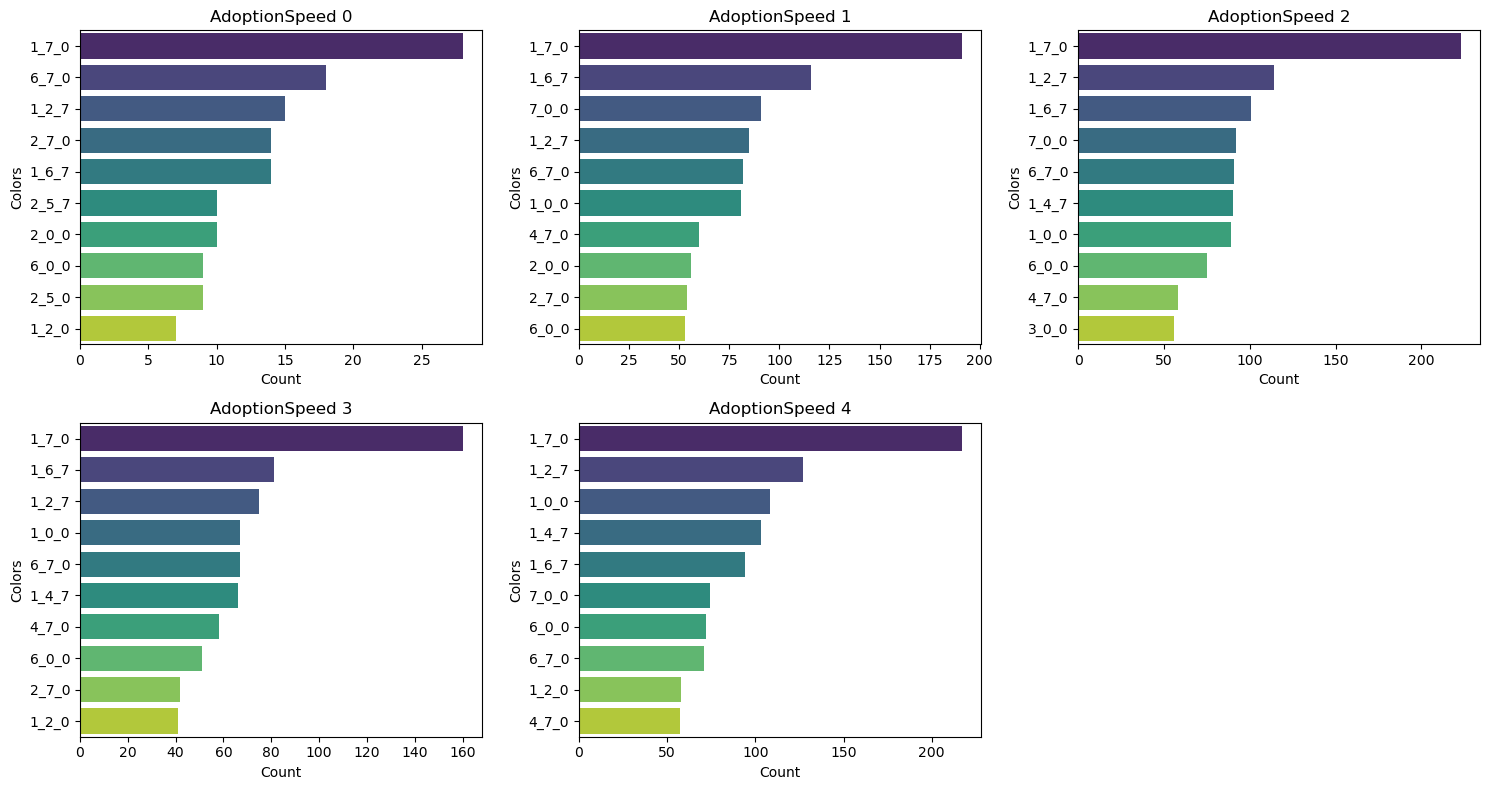

In [52]:
# GATOS: Contar la frecuencia de cada combinación de colores para cada velocidad de adopción
cats['Colors'] = cats.apply(lambda x: f"{x['Color1']}_{x['Color2']}_{x['Color3']}", axis=1)
color_adoption_counts = cats.groupby(['AdoptionSpeed', 'Colors']).size().reset_index(name='Count')


# Crear una lista para almacenar los resultados del top 10 por cada AdoptionSpeed
top_10_colors_per_speed = []

# Iterar sobre cada valor único de AdoptionSpeed y obtener el top 10
for speed in color_adoption_counts['AdoptionSpeed'].unique():
    top_colors = color_adoption_counts[color_adoption_counts['AdoptionSpeed'] == speed]
    top_10_colors = top_colors.sort_values(by='Count', ascending=False).head(10)
    top_10_colors_per_speed.append(top_10_colors)

# Concatenar todos los top 10 en un solo DataFrame
top_10_colors_per_speed_cats = pd.concat(top_10_colors_per_speed)

# Mostrar el resultado
# print(top_10_colors_per_speed_cats)

# Configuración de la figura
plt.figure(figsize=(15, 8))

# Iterar sobre cada velocidad de adopción para crear subplots
for i, speed in enumerate(color_adoption_counts['AdoptionSpeed'].unique()):
    plt.subplot(2, 3, i + 1)
    top_colors = top_10_colors_per_speed_cats[top_10_colors_per_speed_cats['AdoptionSpeed'] == speed]
    sns.barplot(x='Count', y='Colors', data=top_colors, palette='viridis')
    plt.title(f'AdoptionSpeed {speed}')

plt.tight_layout()
plt.show()

In [56]:
df['AdoptionSpeed'].value_counts()

AdoptionSpeed
4    4197
2    4037
3    3259
1    3090
0     410
Name: count, dtype: int64

### Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación


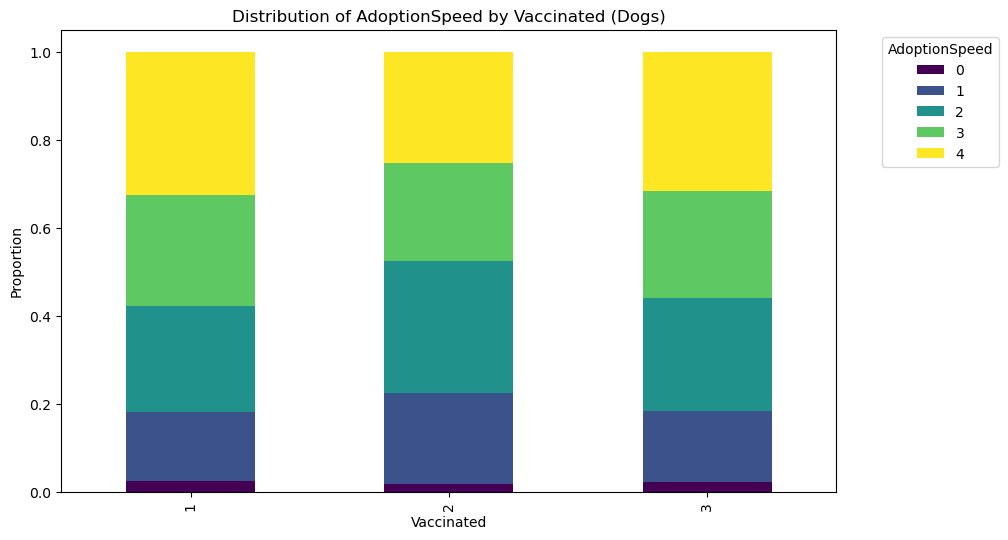

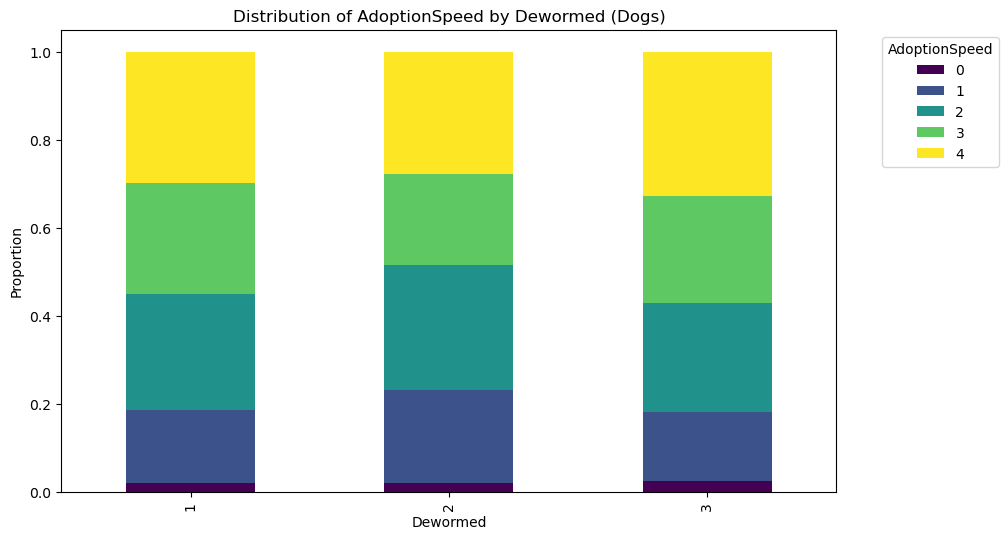

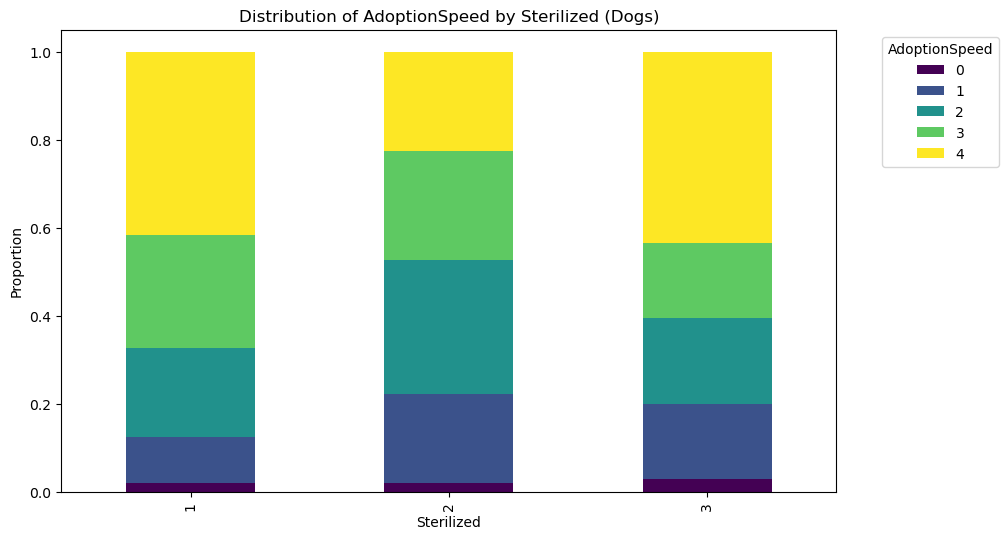

In [58]:
# Función para crear gráficos de barras apiladas
def stacked_bar_plot(df, column, title):
    # Calcular la distribución de AdoptionSpeed dentro de cada categoría
    distribution = df.groupby([column, 'AdoptionSpeed']).size().unstack(fill_value=0)
    distribution_norm = distribution.div(distribution.sum(axis=1), axis=0)
    
    # Graficar
    distribution_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Gráficos para perros
for column in ['Vaccinated', 'Dewormed', 'Sterilized', 'Health']:
    stacked_bar_plot(dogs, column, f'Distribution of AdoptionSpeed by {column} (Dogs)')

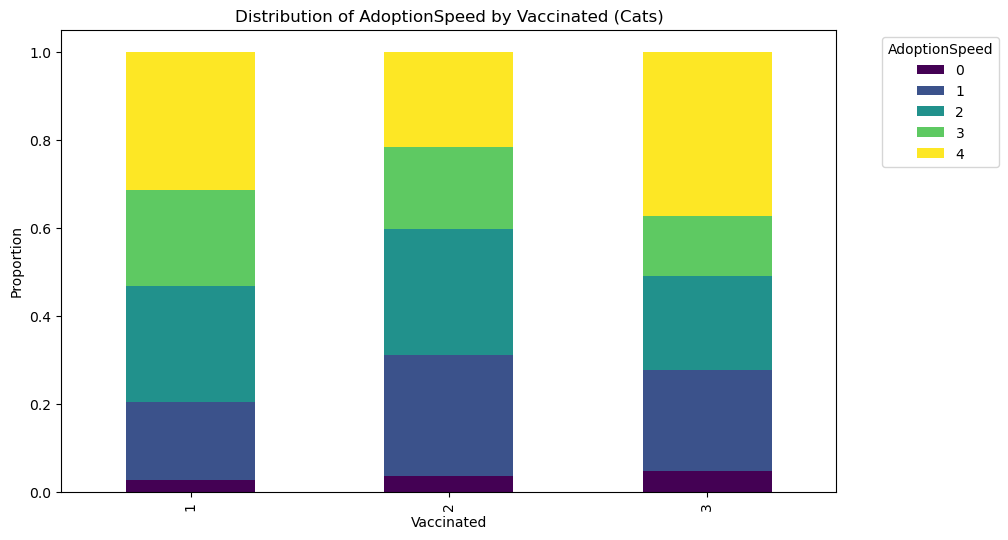

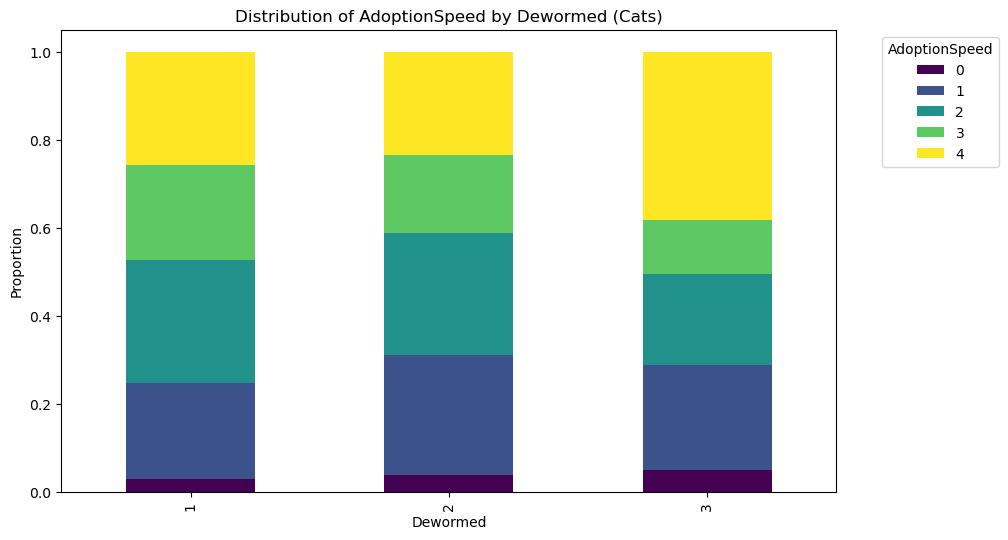

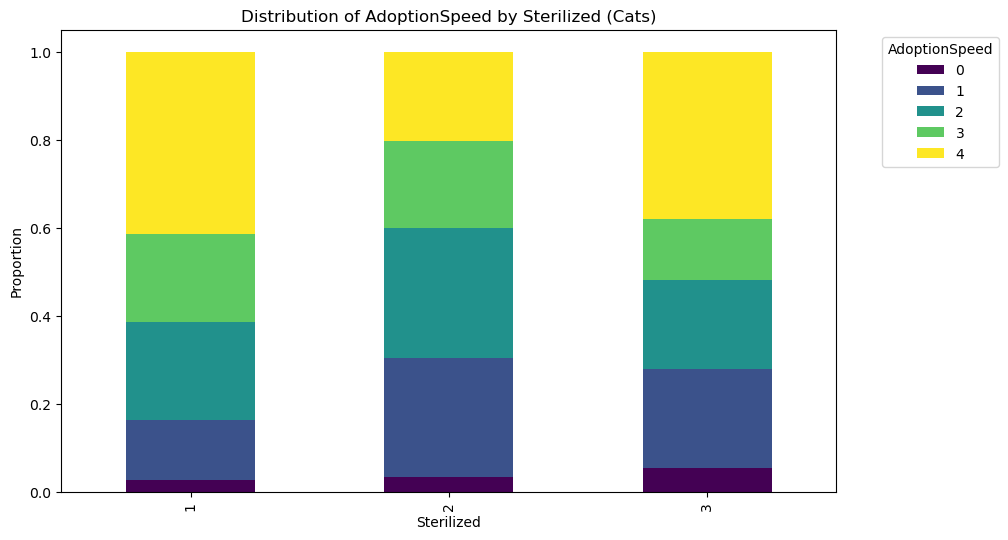

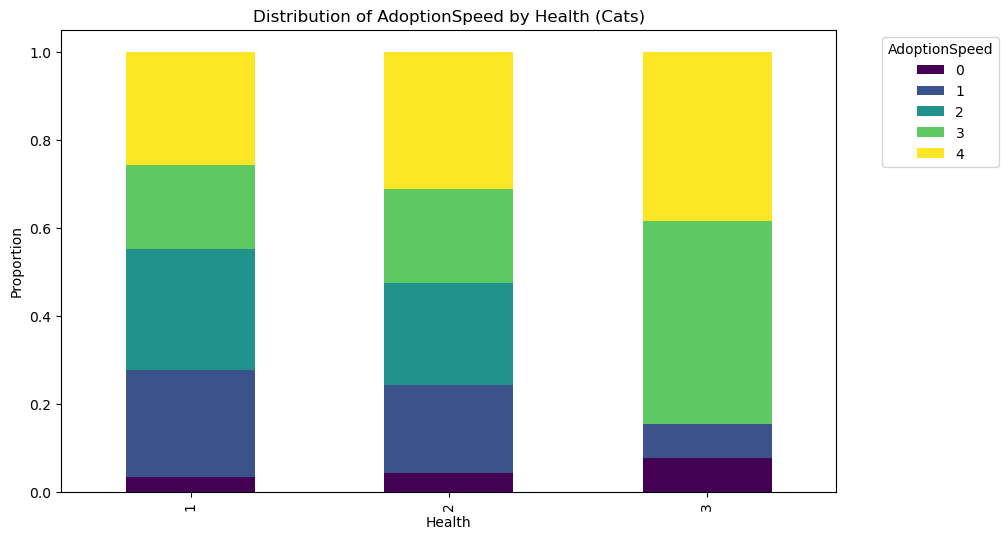

In [60]:
# Gráficos para gatos
for column in ['Vaccinated', 'Dewormed', 'Sterilized', 'Health']:
    stacked_bar_plot(cats, column, f'Distribution of AdoptionSpeed by {column} (Cats)')

### Entender el impacto del Fee cobrado


c:\Users\iparra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\iparra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\iparra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


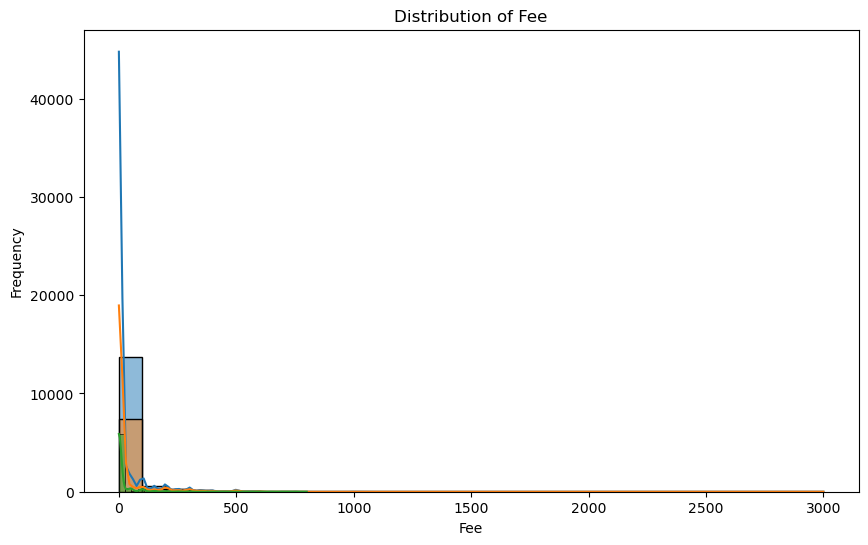

In [64]:
# Visualizar la distribución de Fee
plt.figure(figsize=(10, 6))
sns.histplot(df['Fee'], bins=30, kde=True)
sns.histplot(dogs['Fee'], bins=30, kde=True)
sns.histplot(cats['Fee'], bins=30, kde=True)
plt.title('Distribution of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.show()

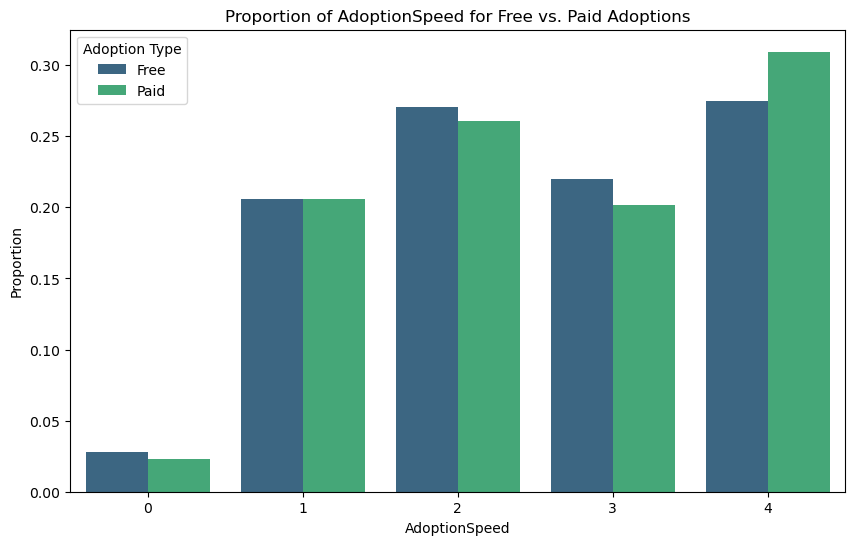

In [79]:
# Crear una columna para indicar si la adopción fue gratuita o pagada
df['AdoptionType'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else 'Paid')

# Calcular la proporción de cada AdoptionSpeed para adopciones gratuitas y pagadas
adoption_counts = df.groupby(['AdoptionType', 'AdoptionSpeed']).size().unstack(fill_value=0)
adoption_proportions = adoption_counts.div(adoption_counts.sum(axis=1), axis=0)
adoption_proportions.reset_index(inplace=True)


# Transformar los datos para el gráfico
adoption_proportions_melted = adoption_proportions.melt(id_vars='AdoptionType', var_name='AdoptionSpeed', value_name='Proportion')

# Graficar las proporciones de AdoptionSpeed para adopciones gratuitas y pagadas
plt.figure(figsize=(10, 6))
sns.barplot(x='AdoptionSpeed', y='Proportion', hue='AdoptionType', data=adoption_proportions_melted, palette='viridis')
plt.title('Proportion of AdoptionSpeed for Free vs. Paid Adoptions')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proportion')
plt.legend(title='Adoption Type')
plt.show()

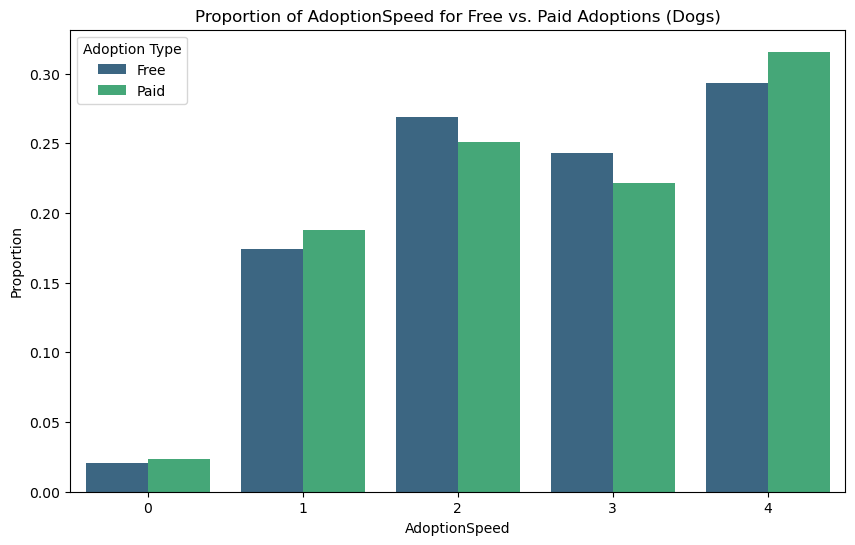

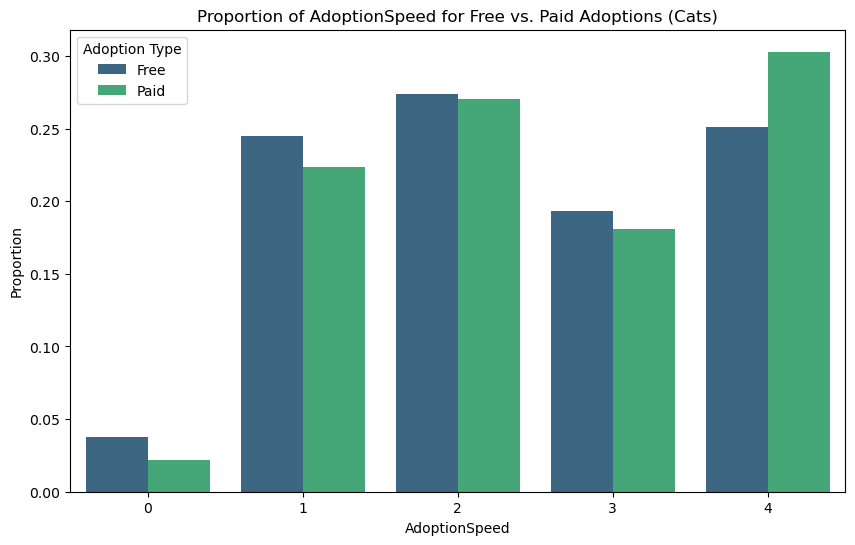

In [83]:
# Calcular la proporción de cada AdoptionSpeed para adopciones gratuitas y pagadas para perros
adoption_counts_dogs = dogs.groupby(['AdoptionType', 'AdoptionSpeed']).size().unstack(fill_value=0)
adoption_proportions_dogs = adoption_counts_dogs.div(adoption_counts_dogs.sum(axis=1), axis=0)
adoption_proportions_dogs.reset_index(inplace=True)

# Calcular la proporción de cada AdoptionSpeed para adopciones gratuitas y pagadas para gatos
adoption_counts_cats = cats.groupby(['AdoptionType', 'AdoptionSpeed']).size().unstack(fill_value=0)
adoption_proportions_cats = adoption_counts_cats.div(adoption_counts_cats.sum(axis=1), axis=0)
adoption_proportions_cats.reset_index(inplace=True)


# Transformar los datos para el gráfico de perros
adoption_proportions_dogs_melted = adoption_proportions_dogs.melt(id_vars='AdoptionType', var_name='AdoptionSpeed', value_name='Proportion')

# Graficar las proporciones de AdoptionSpeed para adopciones gratuitas y pagadas para perros
plt.figure(figsize=(10, 6))
sns.barplot(x='AdoptionSpeed', y='Proportion', hue='AdoptionType', data=adoption_proportions_dogs_melted, palette='viridis')
plt.title('Proportion of AdoptionSpeed for Free vs. Paid Adoptions (Dogs)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proportion')
plt.legend(title='Adoption Type')
plt.show()


# Transformar los datos para el gráfico de gatos
adoption_proportions_cats_melted = adoption_proportions_cats.melt(id_vars='AdoptionType', var_name='AdoptionSpeed', value_name='Proportion')

# Graficar las proporciones de AdoptionSpeed para adopciones gratuitas y pagadas para gatos
plt.figure(figsize=(10, 6))
sns.barplot(x='AdoptionSpeed', y='Proportion', hue='AdoptionType', data=adoption_proportions_cats_melted, palette='viridis')
plt.title('Proportion of AdoptionSpeed for Free vs. Paid Adoptions (Cats)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proportion')
plt.legend(title='Adoption Type')
plt.show()

### Estudiar las Regiones Geográficas disponibles


In [84]:
df['State'].unique()

array([41326, 41401, 41330, 41327, 41361, 41336, 41324, 41335, 41325,
       41332, 41345, 41342, 41367, 41415], dtype=int64)

In [85]:
df['State'].value_counts()

State
41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: count, dtype: int64

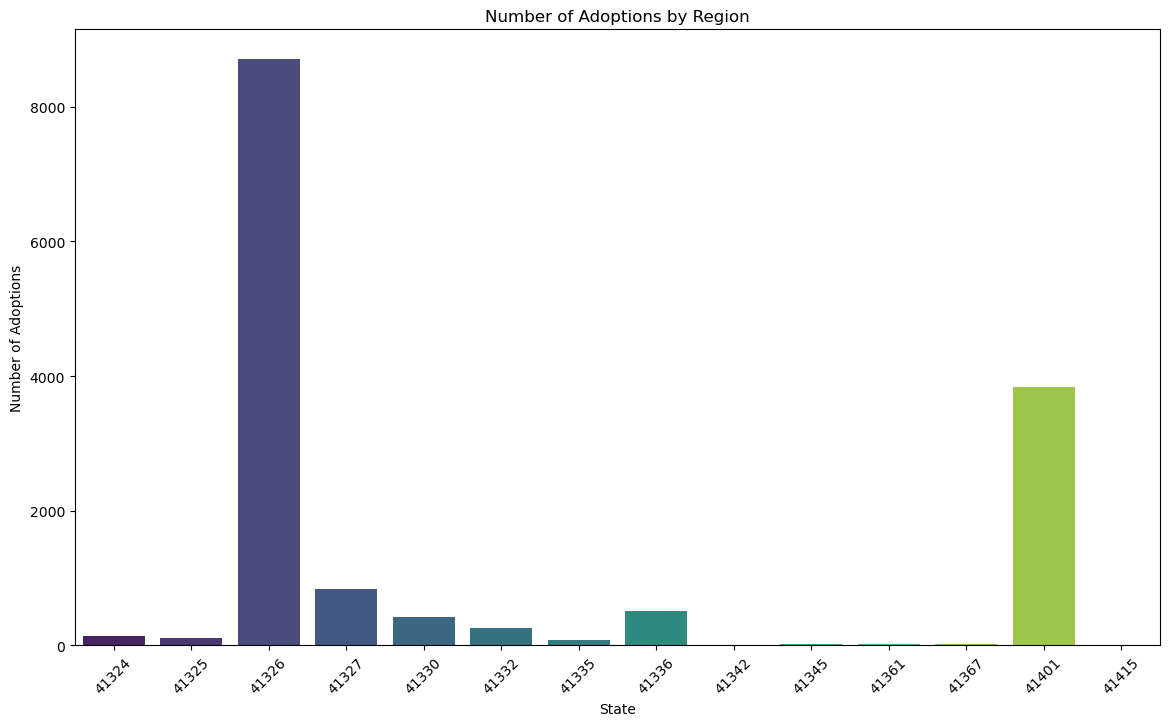

In [86]:
# Obtener el conteo de adopciones por región
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Graficar el conteo de adopciones por región
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Count', data=state_counts, palette='viridis')
plt.title('Number of Adoptions by Region')
plt.xlabel('State')
plt.ylabel('Number of Adoptions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
adoption_proportions_cats_melted = adoption_proportions_cats.melt(id_vars='AdoptionType', var_name='AdoptionSpeed', value_name='Proportion')

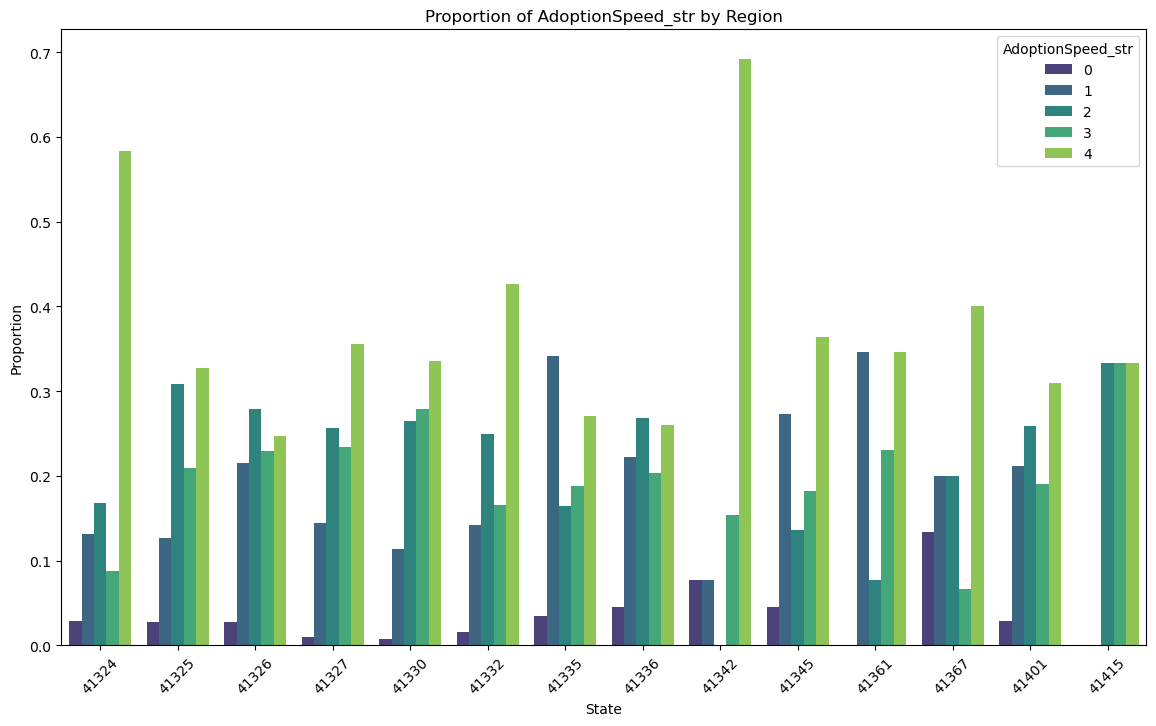

In [89]:
# Calcular la proporción de cada AdoptionSpeed por región
df['AdoptionSpeed_str'] = df['AdoptionSpeed'].astype(str)
adoption_counts_state = df.groupby(['State', 'AdoptionSpeed_str']).size().unstack(fill_value=0)
adoption_proportions_state = adoption_counts_state.div(adoption_counts_state.sum(axis=1), axis=0)
adoption_proportions_state.reset_index(inplace=True)

# Transformar los datos para el gráfico
adoption_proportions_state_melted = adoption_proportions_state.melt(id_vars='State', var_name='AdoptionSpeed_str', value_name='Proportion')

# Graficar las proporciones de AdoptionSpeed_str por región
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Proportion', hue='AdoptionSpeed_str', data=adoption_proportions_state_melted, palette='viridis')
plt.title('Proportion of AdoptionSpeed_str by Region')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='AdoptionSpeed_str')
plt.show()


In [140]:
df_AdoptionSpeed_0 = df[(df.AdoptionSpeed== 0)].copy()
df_AdoptionSpeed_0.head(3)

#sns.boxplot(x="State", y = 'AdoptionSpeed', hue="AdoptionSpeed", data=df_AdoptionSpeed_0)

# Agrupa los datos por estado y calcula la cantidad de adopciones
# grouped_df = df_AdoptionSpeed_0.groupby('State').count().reset_index()
grouped_df = df.groupby(['State','AdoptionSpeed']).size().reset_index(name='counts')
grouped_df



,State,AdoptionSpeed,counts
0,41324,0,4
1,41324,1,18
2,41324,2,23
3,41324,3,12
4,41324,4,80
...,...,...,...
61,41401,3,731
62,41401,4,1192
63,41415,2,1
64,41415,3,1


### Analizar el impacto de tener Fotos y/o Videos

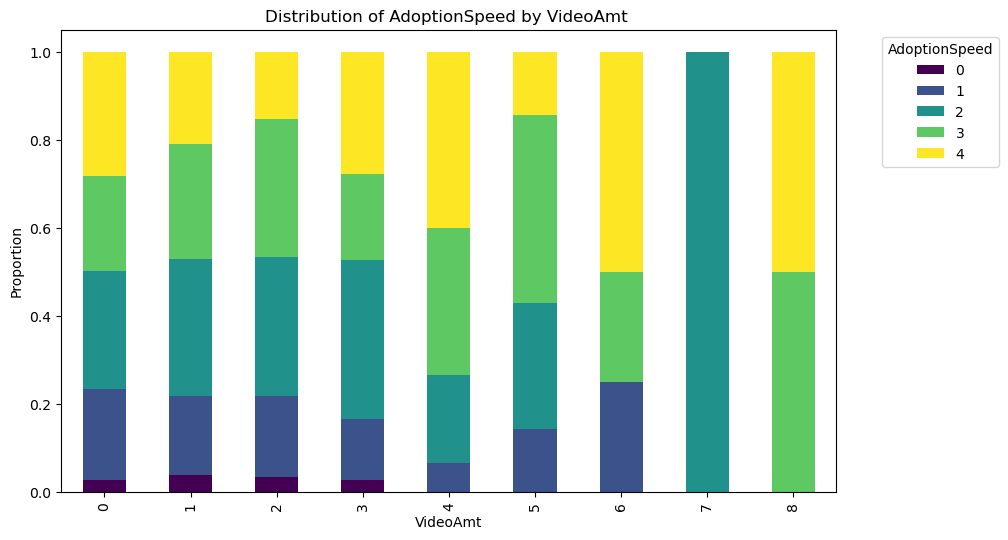

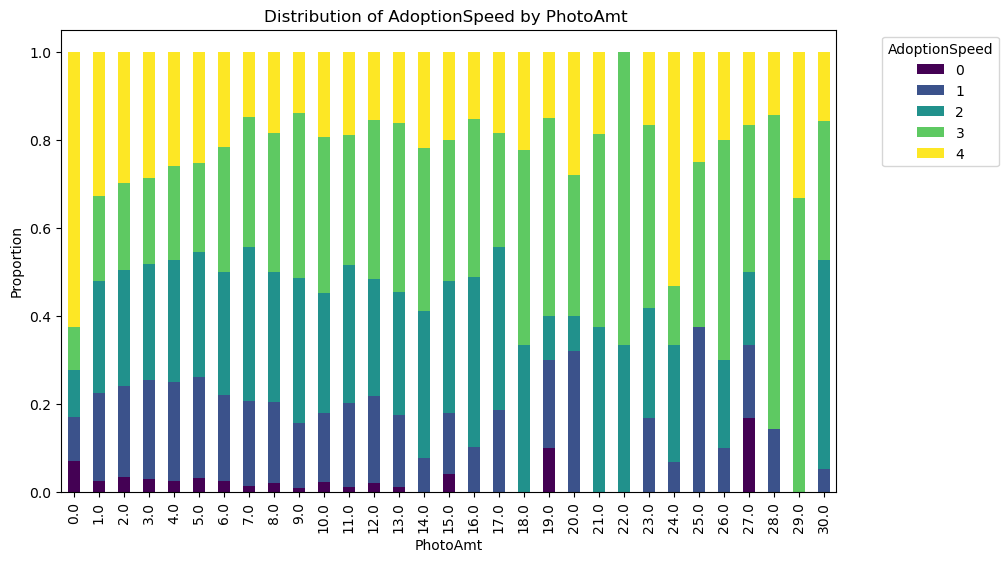

In [122]:
# Función para crear gráficos de barras apiladas
def stacked_bar_plot(df, column, title):
    # Calcular la distribución de AdoptionSpeed dentro de cada categoría
    distribution = df.groupby([column, 'AdoptionSpeed']).size().unstack(fill_value=0)
    distribution_norm = distribution.div(distribution.sum(axis=1), axis=0)
    
    # Graficar
    distribution_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Gráficos para perros
for column in ['VideoAmt','PhotoAmt']:
    stacked_bar_plot(df, column, f'Distribution of AdoptionSpeed by {column} ')

# Análisis del Texto Libre de la Descripción:



In [173]:
# Para NLP
import spacy
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from wordcloud import WordCloud
from textblob import TextBlob
import tensorflow as tf
from keybert import KeyBERT
from bertopic import BERTopic

In [ ]:
!pip install bertopic

### Limpiar palabras

Vamos a trabajar con la librería Spacy para limpiar los textos de signos de puntuación y caracteres especiales.

In [181]:
!python -m spacy download en_core_web_sm>

In [ ]:
#Instancio nlp
nlp = spacy.load("en_core_web_sm")

In [ ]:
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if (
        not token.is_stop
        and not token.is_punct
        and not token.like_url
    ):
        clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)



In [ ]:
def remove_html(text):
  soup = BeautifulSoup(text)

  return soup.get_text()



In [ ]:
# Tarda 10 minutos
df['text_clean']=df['Description'].astype(str).apply(clean_text)

In [ ]:

df['text_clean']=df['text_clean'].astype(str).apply(remove_html)

# 

### Tokenizar Palabras más frecuentes


In [145]:
def get_longitud_text(text):
  return len(text)

df['Description'] = df['Description'].astype(str)
df['Description_length'] = df['Description'].apply(get_longitud_text)
df['Description_length'].describe()


count    14993.000000
mean       339.315681
std        373.363047
min          1.000000
25%        117.000000
50%        238.000000
75%        431.000000
max       6664.000000
Name: Description_length, dtype: float64

c:\Users\iparra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


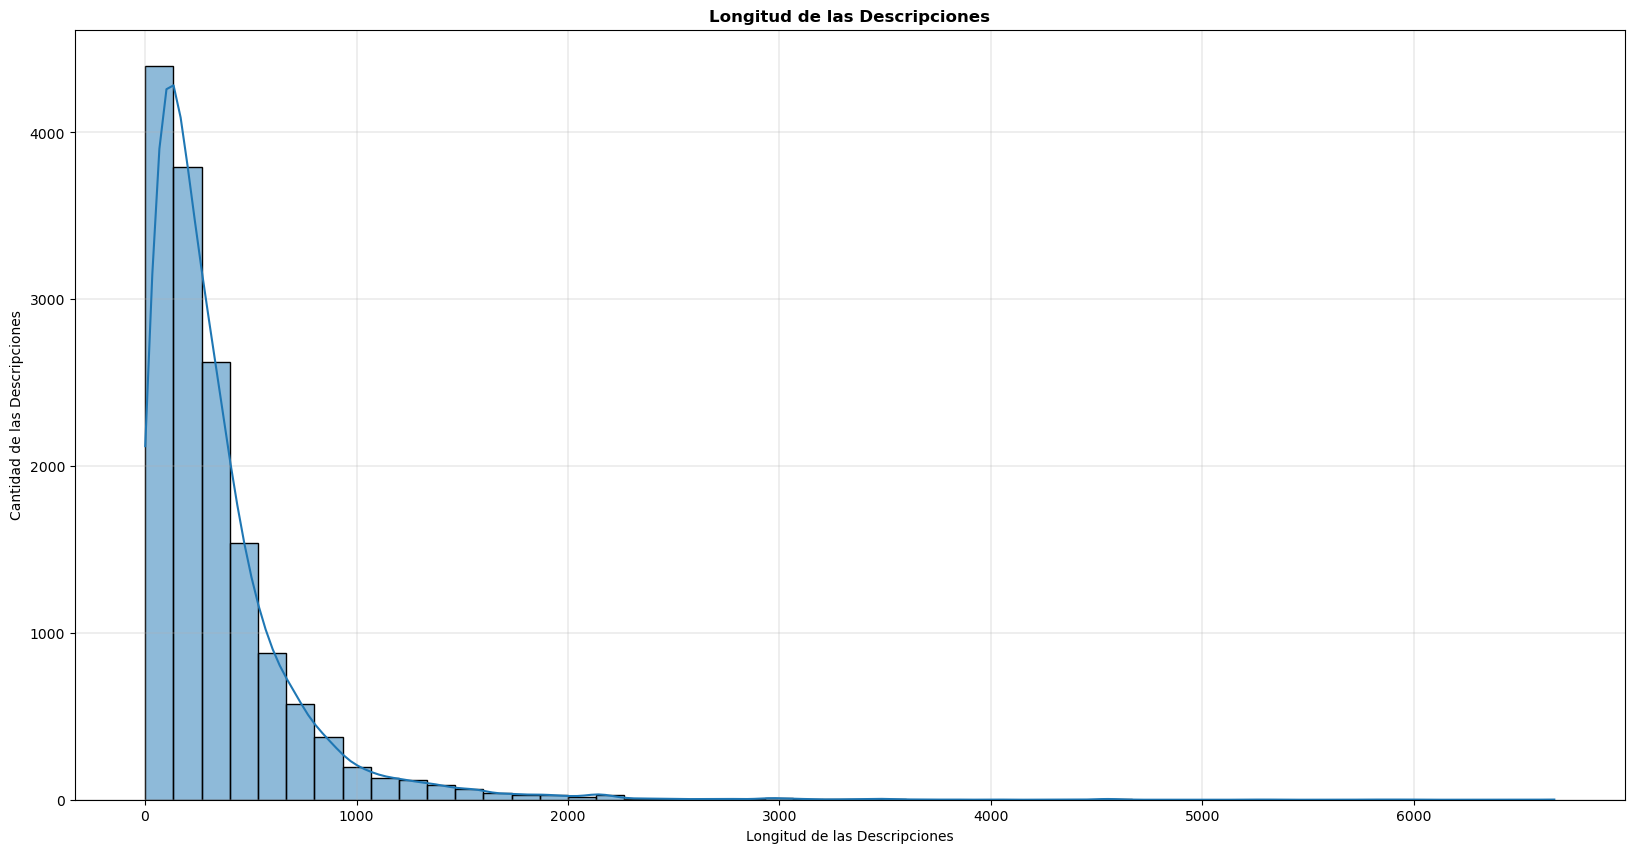

In [148]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Description_length'], kde=True, bins=50)
plt.title('Longitud de las Descripciones', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Longitud de las Descripciones')
plt.grid(linewidth=0.3)
plt.show()

In [146]:
import plotly.express as px

In [154]:
FreqOfWords = df['Description'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]
FreqOfWords_top200.head(50)


and          30811
to           28801
a            23255
is           18102
the          16639
             ...  
know           676
currently      671
No             667
due            666
willing        664
Name: count, Length: 200, dtype: int64

### WordCloud para Descripciones limpias

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

nlp.Defaults.stop_words.add("nan")



In [ ]:
%matplotlib inline
def cloud(data,backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [ ]:
cloud(' '.join(df['Description']))

In [158]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [160]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required ( Forefront
[nltk_data]     TMG requires authorization to fulfill the request.
[nltk_data]     Access to the Web Proxy filter is denied.  )>
[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required ( Forefront
[nltk_data]     TMG requires authorization to fulfill the request.
[nltk_data]     Access to the Web Proxy filter is denied.  )>


False

In [159]:
# Obtener todas las descripciones como una lista de palabras
all_descriptions = ' '.join(df['Description'].dropna())  # Concatenar todas las descripciones

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('english'))  # Definir stopwords en inglés
word_tokens = word_tokenize(all_descriptions.lower())  # Tokenización y convertir a minúsculas
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]  # Filtrar stopwords y no palabras alfanuméricas

# Obtener la frecuencia de las palabras después de la limpieza
freq_of_words = pd.Series(filtered_words).value_counts()

print(freq_of_words.head(20))  # Mostrar las 20 palabras más frecuentes

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\iparra/nltk_data'
    - 'c:\\Users\\iparra\\AppData\\Local\\anaconda3\\nltk_data'
    - 'c:\\Users\\iparra\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\iparra\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\iparra\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Concatenar todas las descripciones en un solo texto
all_descriptions = ' '.join(df['Description'].dropna())

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('english'))  # Definir stopwords en inglés
word_tokens = word_tokenize(all_descriptions.lower())  # Tokenización y convertir a minúsculas
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]  # Filtrar stopwords y no palabras alfanuméricas

# Crear DataFrame con las palabras y sus frecuencias
freq_of_words = pd.Series(filtered_words).value_counts().reset_index()
freq_of_words.columns = ['Word', 'Frequency']

# Seleccionar las 20 palabras más frecuentes
top_words = freq_of_words.head(20)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras horizontal
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Most Frequent Words in Pet Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### NER

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

<br>Una entidad puede ser:

- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

<br>Utilizaremos spacy para extraer las entidades de reviews.

In [174]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
  return ents

In [179]:
df["NER"] = df["text_clean"].apply(get_entities)
# df["NER"] = df["Description"].apply(get_entities)

NameError: name 'nlp' is not defined

In [ ]:
df[['text', 'NER']].sample(10)

Aplicamos EXPLODE
<br>
En pandas, la función .explode() nos permite transformar una filas de un dataset que tienen una lista (como nuestra columna NER) en muchas filas (una por elemento en la lista).
<br>
Aplicamos dicha función a nuestra columna NER pero sin modificar el df original, guardando el resultado en otro df.

In [ ]:
df_exploded = df.explode("NER")
df_exploded.head()

Wordcloud de los NER

In [ ]:
df_exploded['NER_NER'] = df_exploded['NER'].apply(lambda x : str(x or ""))

In [ ]:
df_exploded = df_exploded[df_exploded['NER_NER'] != 'nan']
cloud(' '.join(df_exploded['NER_NER']))

Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estas reviews.
<br>
Obtenemos el top 20 de entidades más frecuentes.

In [ ]:
df_ner_exploded = df_exploded[df_exploded.NER.apply(lambda x: not x.isnumeric())][['review_id','NER']].groupby("NER").count().sort_values(by="review_id", ascending=False).rename(columns = {'review_id':'cantidad'}).reset_index().head(20)

In [ ]:
df_ner_exploded

In [ ]:
sns.barplot(data=df_ner_exploded, x="cantidad", y="NER")

Las primeras 20 reviews que están asociadas a más NERs

In [ ]:
df_exploded.groupby('review_id').agg({'NER':'count'}).sort_values(by="NER", ascending=False).rename(columns = {'NER':'cantidad_NER'}).reset_index().head(20)

### Part of speech


POS es el proceso mediante el cual clasificamos a las palabras de un texto en categorías gramaticales. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, se busca identificar sustantivos, verbos, adjetivos, etc dentro de un texto.
<br>
Al igual que NER, para identificar POS en en el texto de las reviews, utilizamos los modelos de spacy.
<br>
Definimos una función que dado un texto, retorne una lista de todos sus sustantivos. En caso de que no contenga sustantivos, debe retornar lista vacia.# 

In [ ]:

def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [ ]:
df["NOUNS"] = df["text_clean"].apply(get_nouns)

Hacemos un explode, como hicimos con los NER

In [ ]:
df_exploded_nouns = df.explode("NOUNS")
df_exploded_nouns.head()

Sustantivos más repetidos.

In [ ]:
df_exploded_nouns[['NOUNS','user_id']].groupby("NOUNS").count().sort_values(by="user_id", ascending=False).rename(columns={'user_id':'cantidad'}).reset_index().head(20)

### Wordcloud a partir de los sustantivos

In [ ]:
df_exploded_nouns['NOUNS'] = df_exploded_nouns['NOUNS'].apply(lambda x : str(x or ""))
cloud(' '.join(df_exploded_nouns['NOUNS']))

### Noun chunks
Spacy también nos permite extraer "noun chunks" de un texto. Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

Creamos una función que dado un texto retorne un listado de noun chunks. Luego aplicamos la función al dataframe y almacenamos resultados en la columna "NOUN_CHUNKS"

In [ ]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [ ]:
df["NOUN_CHUNKS"] = df["text_clean"].apply(get_noun_chunks)

In [ ]:
df.head()

In [ ]:
df_exploded_nouns_chunks = df.explode("NOUN_CHUNKS")
df_exploded_nouns_chunks.head()

### Sentiment Analysis (Análisis de Sentimiento)

Para análisis de sentimientos utilizamos textblob.

In [184]:
from textblob import TextBlob

SyntaxError: invalid character '≥' (U+2265) (2622496400.py, line 4)

Definimos una función get_sentiment que dado un texto, nos retorne:

- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Luego la aplicarmos a todo el df y almacenamos los resultados en la columna "SENTIMENT"

In [ ]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [ ]:
df["SENTIMENT"] = df["text_clean"].apply(get_sentiment)

In [ ]:
df.head()

Cuantos reviews asociadas a sentimientos (POS, NEU, NEG)

In [ ]:
df_copy = df[['SENTIMENT','user_id']].copy()
df_copy = df_copy.rename(columns = {'user_id' : 'cantidad_reviews'})
a = df_copy.groupby("SENTIMENT").count()
a

Gráfico de torta a partir de los datos anteriores

In [ ]:
data = a.cantidad_reviews
labels = ['NEG','NEU','POS']

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Polaridad y Subjetividad de las Descripciones

In [ ]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
df["polarity"] = df["text_clean"].apply(get_polarity)

In [ ]:
df["subjectivity"] = df["text_clean"].apply(get_subjectivity)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
plt = plt.figure(figsize=(16, 7))
sns.set(style="darkgrid")

sns.histplot(data=df, x="polarity", color="skyblue", label="Polarity", kde=True)
sns.histplot(data=df, x="subjectivity", color="red", label="Subjectivity", kde=True)

plt.legend() 
plt.show()

In [ ]:
# Promedio de polaridad
df['polarity'].mean()

In [ ]:
# Desviación Estándar de polaridad
df['polarity'].std()

In [ ]:
# Promedio de subjetividad
df['subjectivity'].mean()

In [ ]:
# Desviación Estándar de subjetividad
df['subjectivity'].std()

Vemos que la subjetividad y la polaridad estan un poco sesgadas hacia la derecha, lo cuál estaría indicando la presencia de reviews con sentimientos positivos.

Agrupamos Sustantivas y Sentimientos

In [ ]:
noun_sentiments = df.explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"text_clean": "count"}).sort_values(by="NOUNS", ascending=False).rename(columns={'text_clean':'cantidad'})
noun_sentiments.sample(20)

Sustantivos asociados a reviews más negativas

In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="cantidad", ascending=False).head(10)

Sustantivos asociados a reviews más positivas

In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="cantidad", ascending=False).head(10)

### KeyBERT

Ahora vamos a analizar las keywords.

In [ ]:
df["KEYWORDS"] = df['text_clean'].apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

In [ ]:
df.head()

Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [ ]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
df.head()

Ahora podemos ver la popularidad de las keywords:

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(y=df.explode("KEYWORDS").KEYWORDS, 
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:30]
              )


ax.bar_label(ax.containers[0])

plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_keywords = df.explode("KEYWORDS")

In [ ]:
df_keywords.head()

WordCloud para las keywords

In [ ]:
df_keywords['KEYWORDS'] = df_keywords['KEYWORDS'].apply(lambda x : str(x or ""))

cloud(' '.join(df_keywords['KEYWORDS']))

### BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [ ]:
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["text_clean"].values)

In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

El topico -1 corresponde a outliers.

In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(20)

In [ ]:
topic_model.visualize_topics()

WordCloud de tópicos

In [ ]:
cloud(' '.join(df['TOPIC_NAME']))

### Bag of Words / TF-IDF